In [9]:
import torch

acts = torch.load('act-stat-c4-train-128-True.pth')
# acts = torch.load('act-stat-c4-train-1024-eos-True-maxlen-4096.pth')
# acts = torch.load('act-stat-c4-train-8192-eos-True-maxlen-2048.pth')

In [13]:
for k, stat in acts.items():
    if "norm" not in k:
        continue
    amin, amax, mean, std = stat.min, stat.max, stat.mean, stat.std
    absmax = torch.maximum(torch.abs(amin), torch.abs(amax))
    std = absmax.std()
    sigma1 = (absmax.mean()+std)
    thre = 7
    num_outliers = (absmax > thre).sum()
    idx_outliers = (absmax > thre).nonzero(as_tuple=True)[0]
    # print(f"{k}\t{num_outliers}\t{thre}\t{std}")
    print(f"{k}\t{num_outliers}\t{thre}\t{sigma1}\t{std}\n{idx_outliers}")
    scale = absmax / (stat.std**2 - mean**2).sqrt()
    # plt.plot(scale.cpu().numpy())
    # plt.hist(absmax.cpu().numpy(), bins=100)
    # plt.show()

layers.0.attention_norm-output	78	7	5.168739494641545	1.0642425387699632
tensor([  46,  146,  152,  221,  276,  279,  339,  345,  403,  585,  587,  690,
         704,  741,  777,  830,  851, 1021, 1024, 1151, 1179, 1198, 1278, 1308,
        1368, 1391, 1461, 1475, 1506, 1519, 1598, 1604, 1618, 1715, 1739, 1769,
        1830, 1899, 2097, 2139, 2160, 2237, 2311, 2317, 2385, 2421, 2458, 2501,
        2543, 2611, 2637, 2638, 2644, 2885, 2912, 2930, 3002, 3038, 3153, 3179,
        3180, 3221, 3234, 3297, 3427, 3531, 3604, 3678, 3681, 3826, 3870, 3918,
        3955, 3958, 3968, 3970, 4015, 4057], device='cuda:0')
layers.0.ffn_norm-output	31	7	4.3392551099170396	1.311062589775438
tensor([  45,  279,  339,  388,  487,  690,  704,  777,  830,  922, 1052, 1179,
        1308, 1618, 2139, 2172, 2317, 2385, 2877, 2954, 3180, 3297, 3392, 3577,
        3612, 3619, 3681, 3840, 3918, 3968, 3970], device='cuda:0')
layers.1.attention_norm-output	37	7	4.761871917137494	1.3883391450732852
tensor([  45,  15

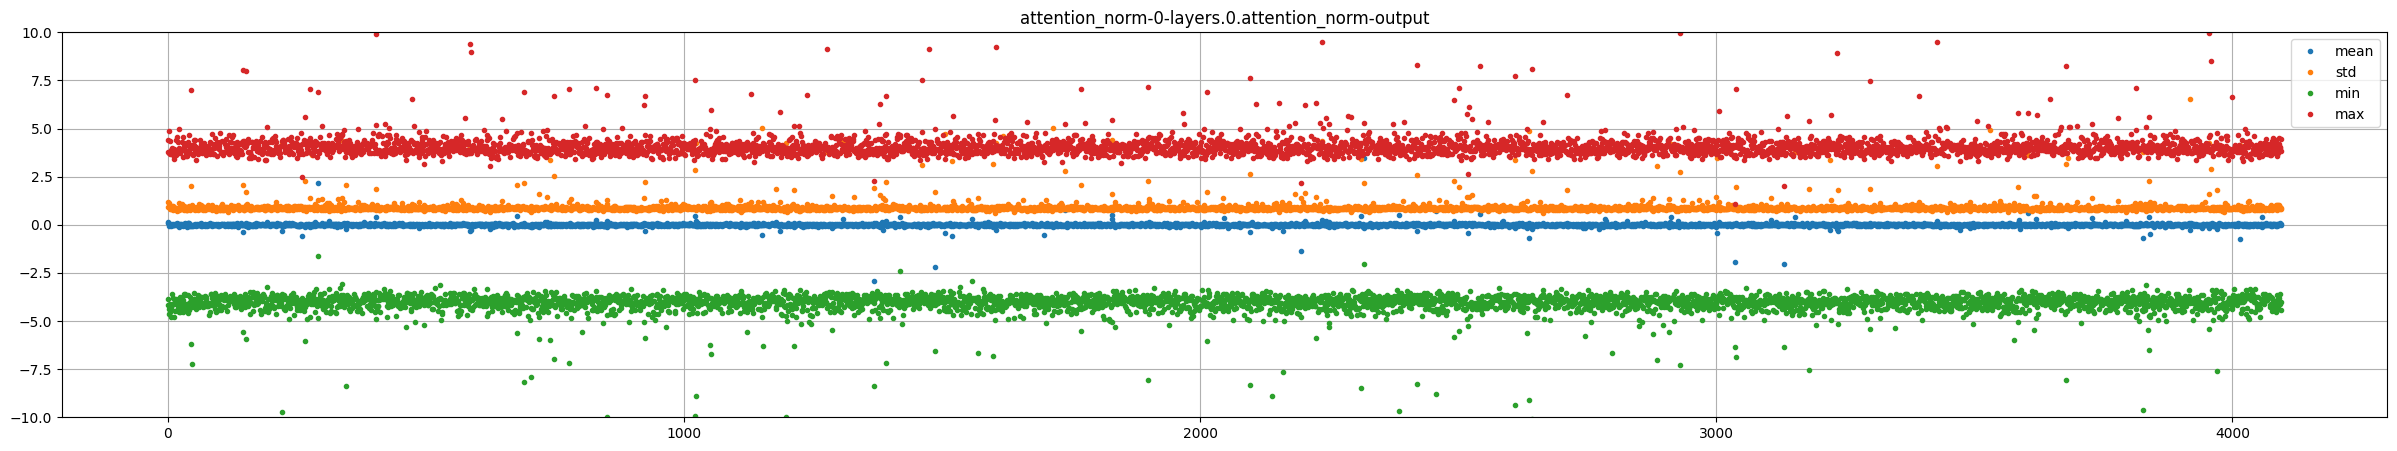

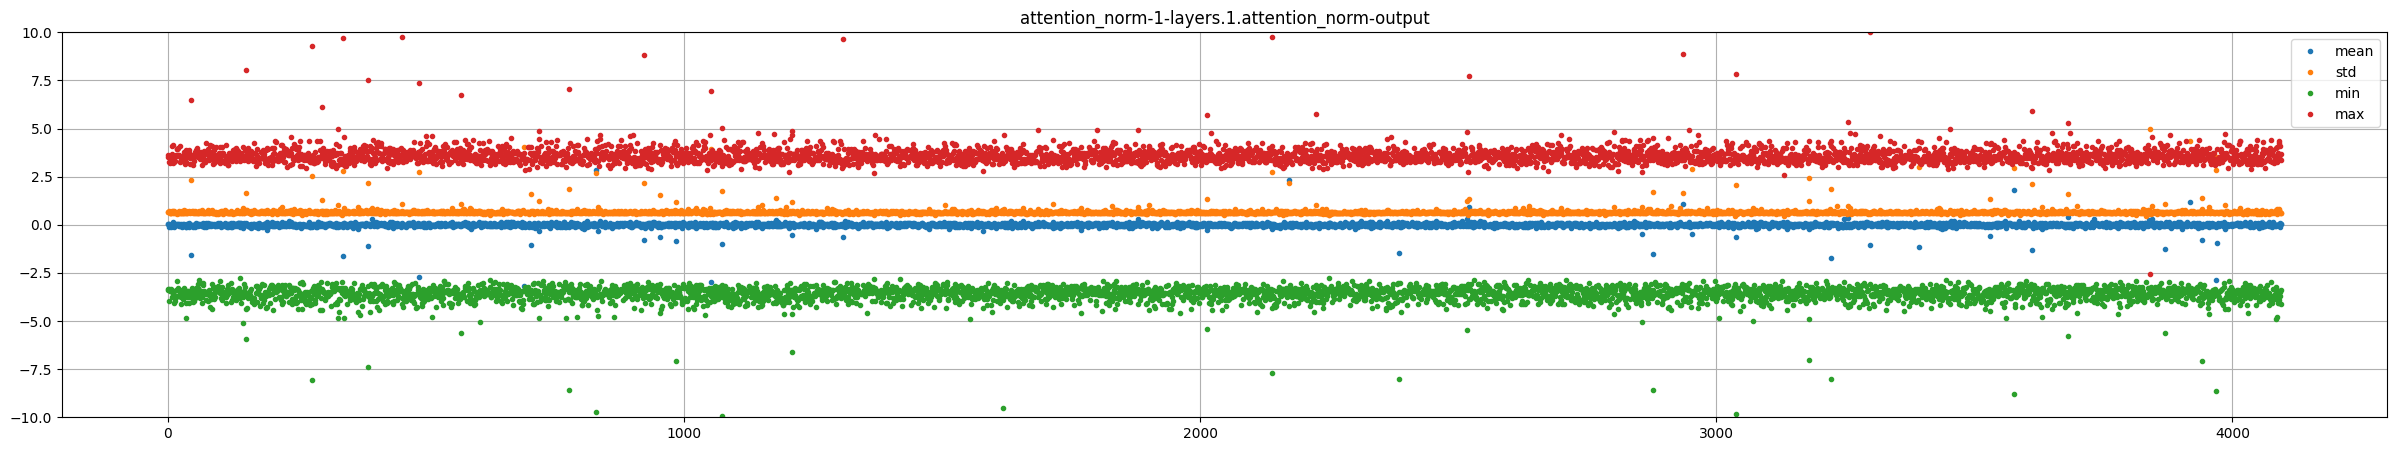

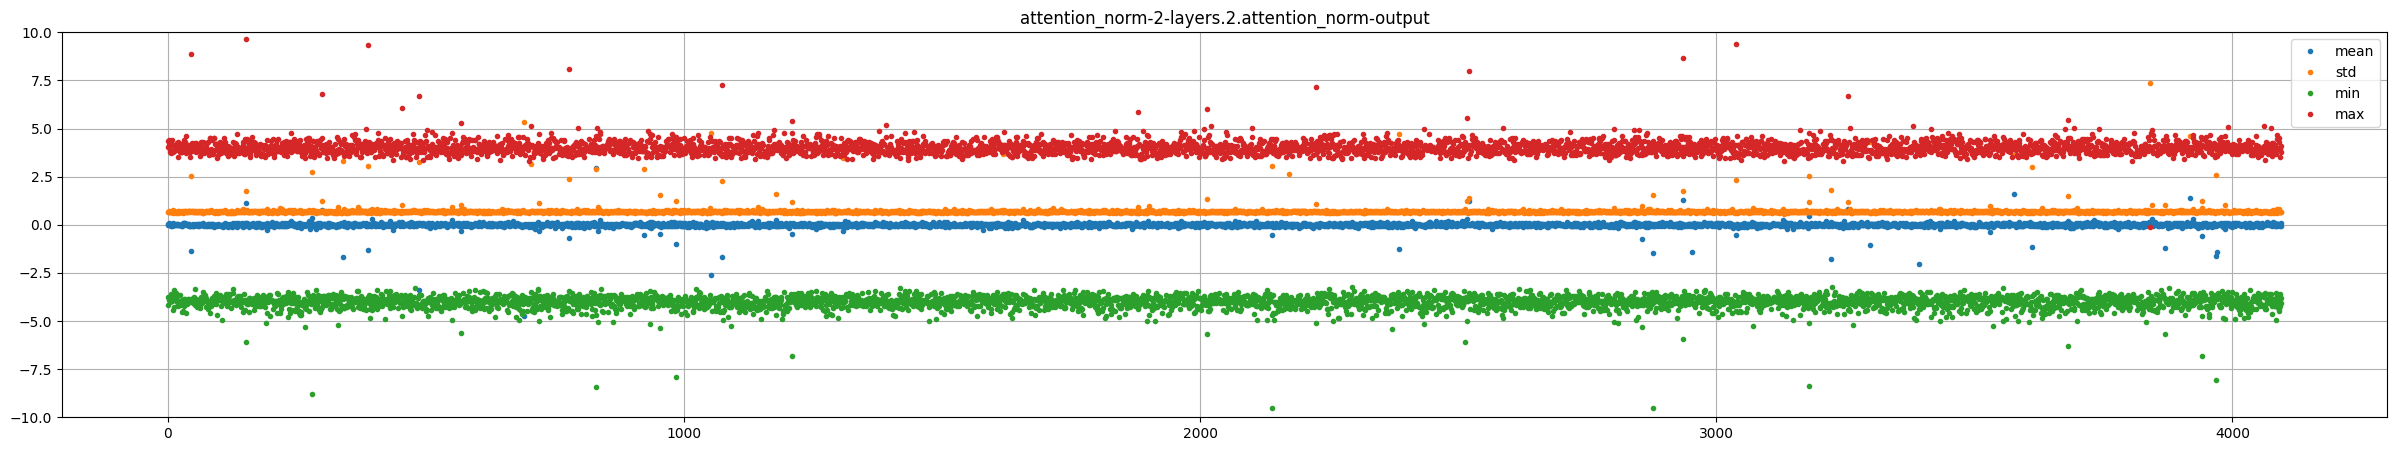

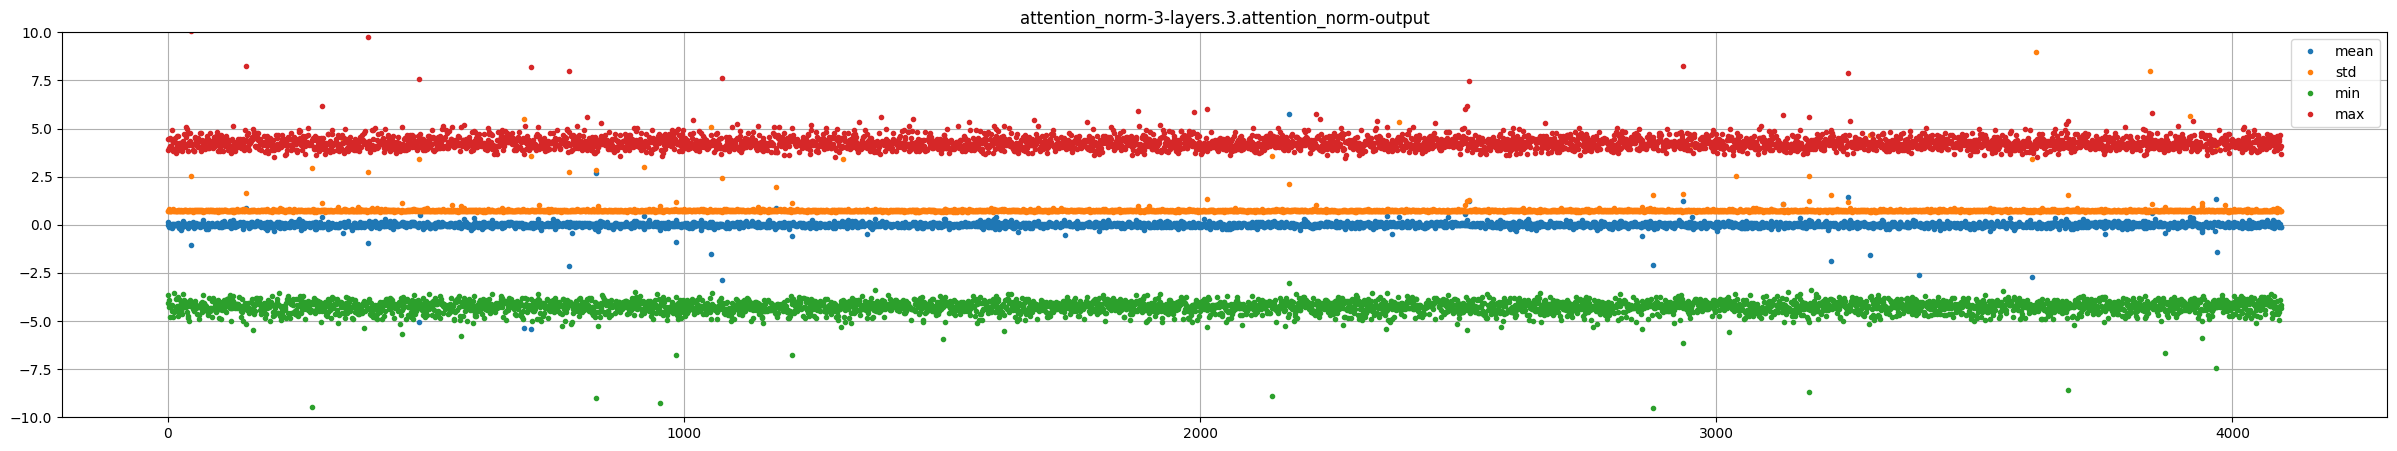

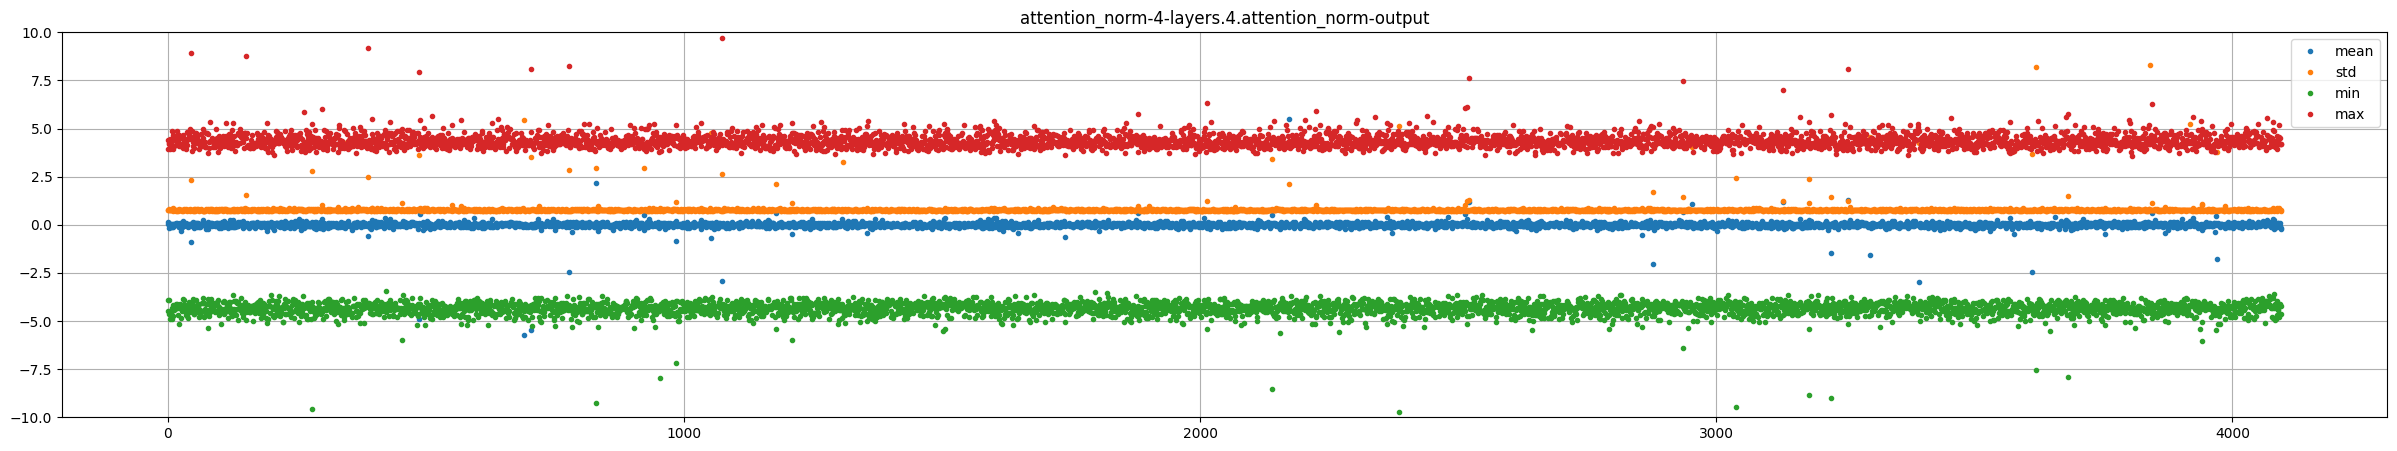

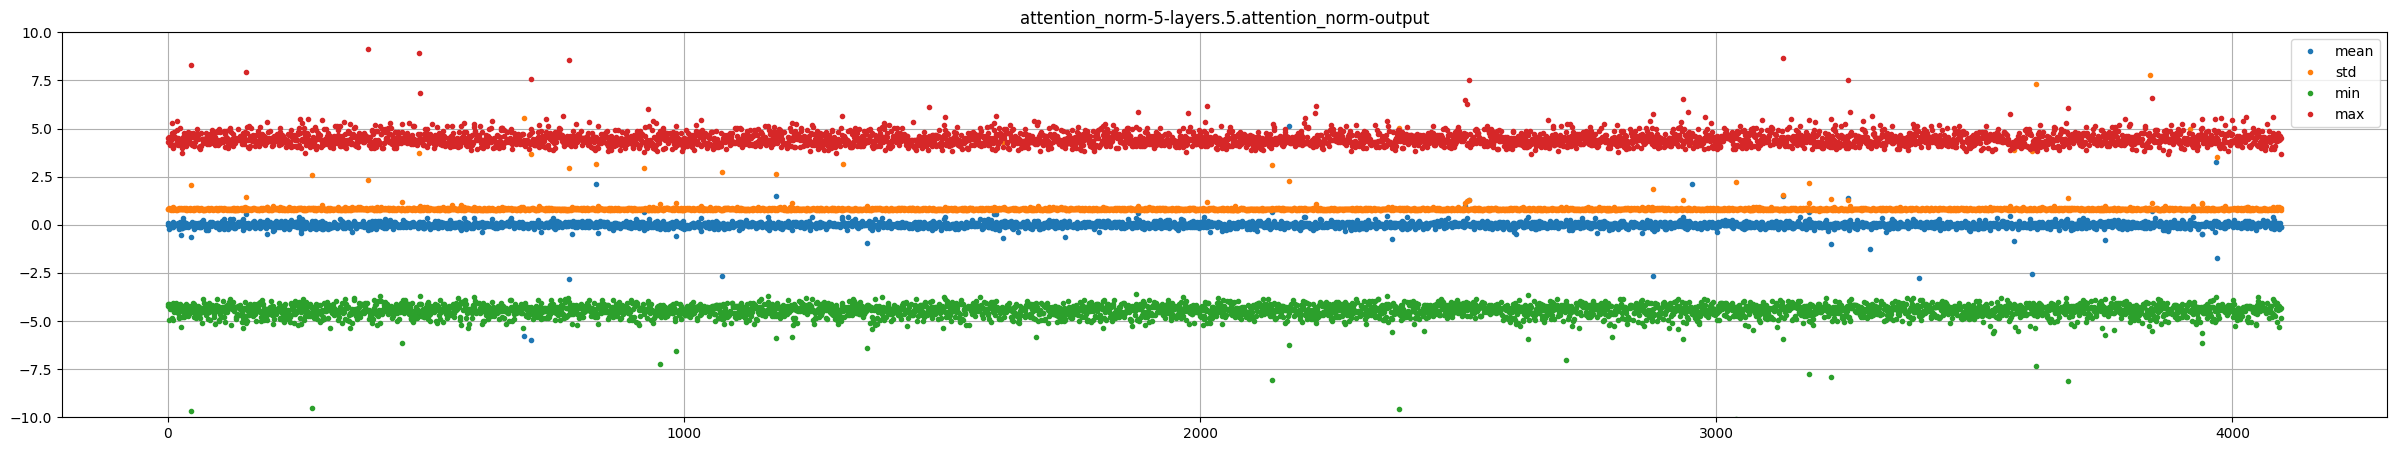

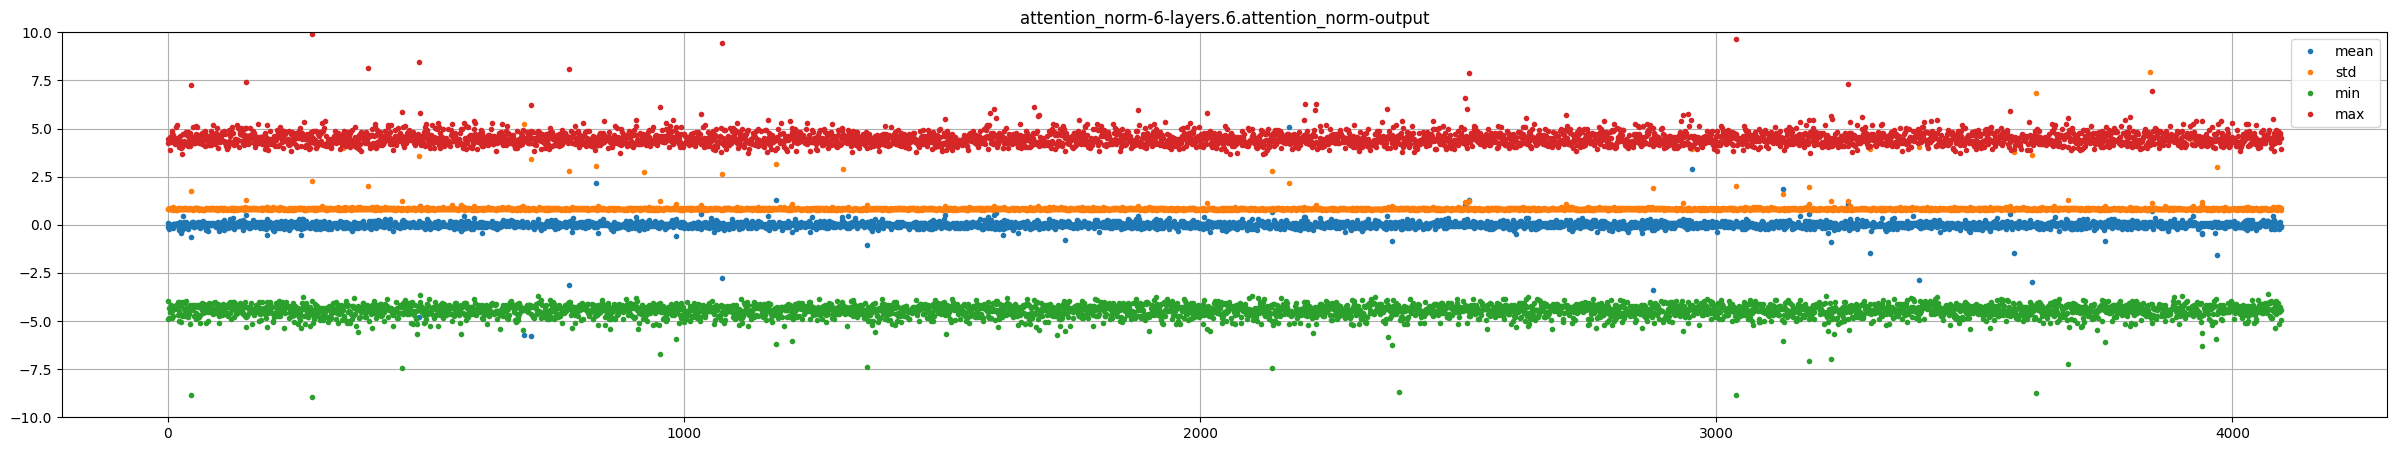

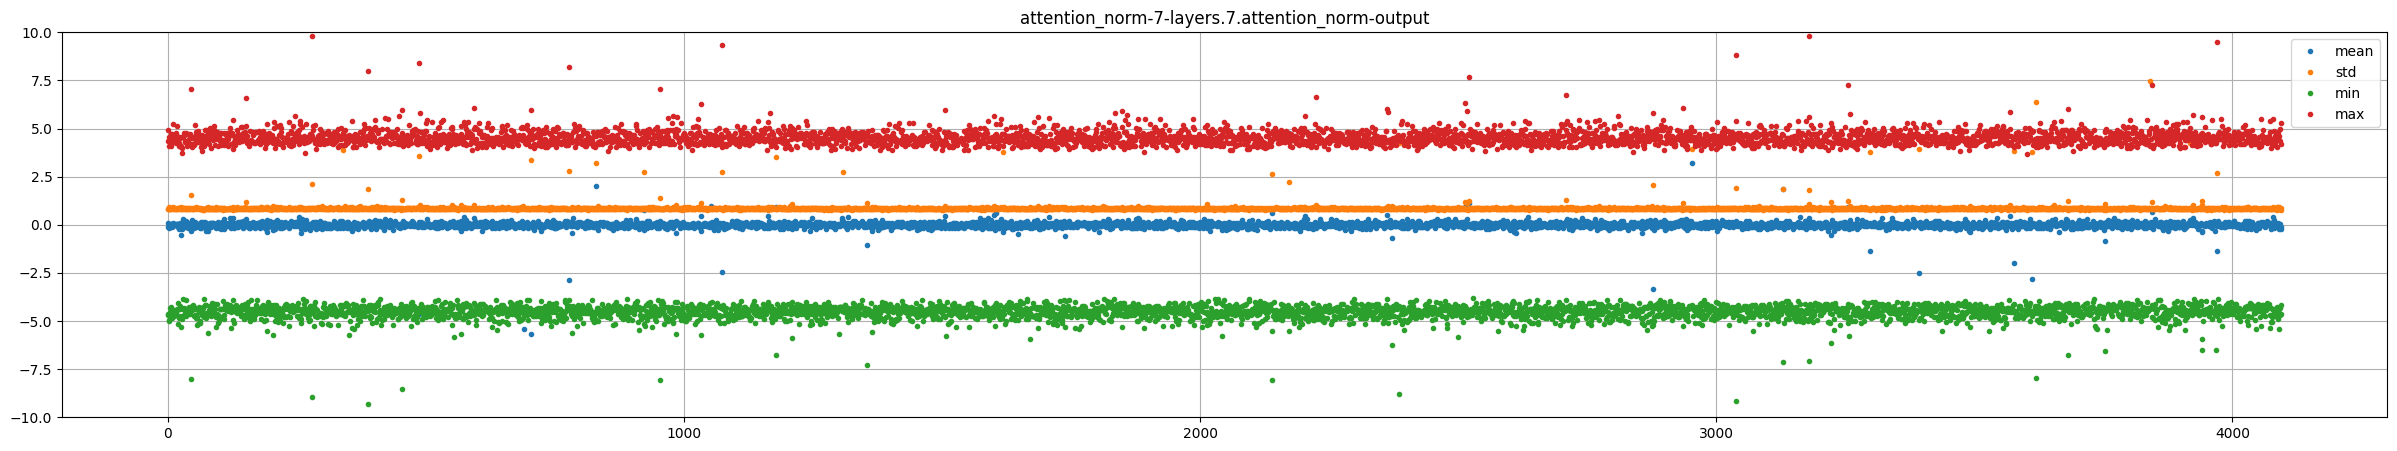

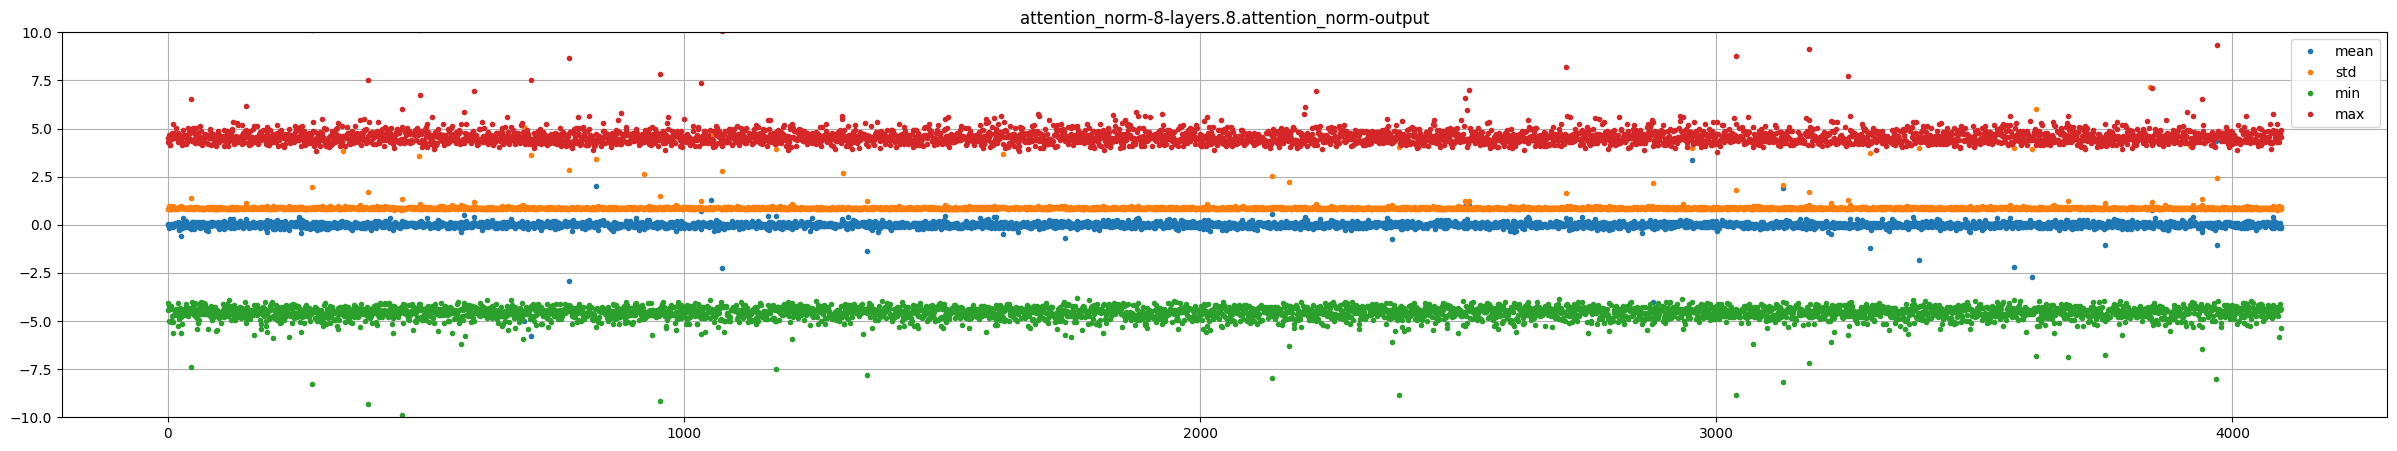

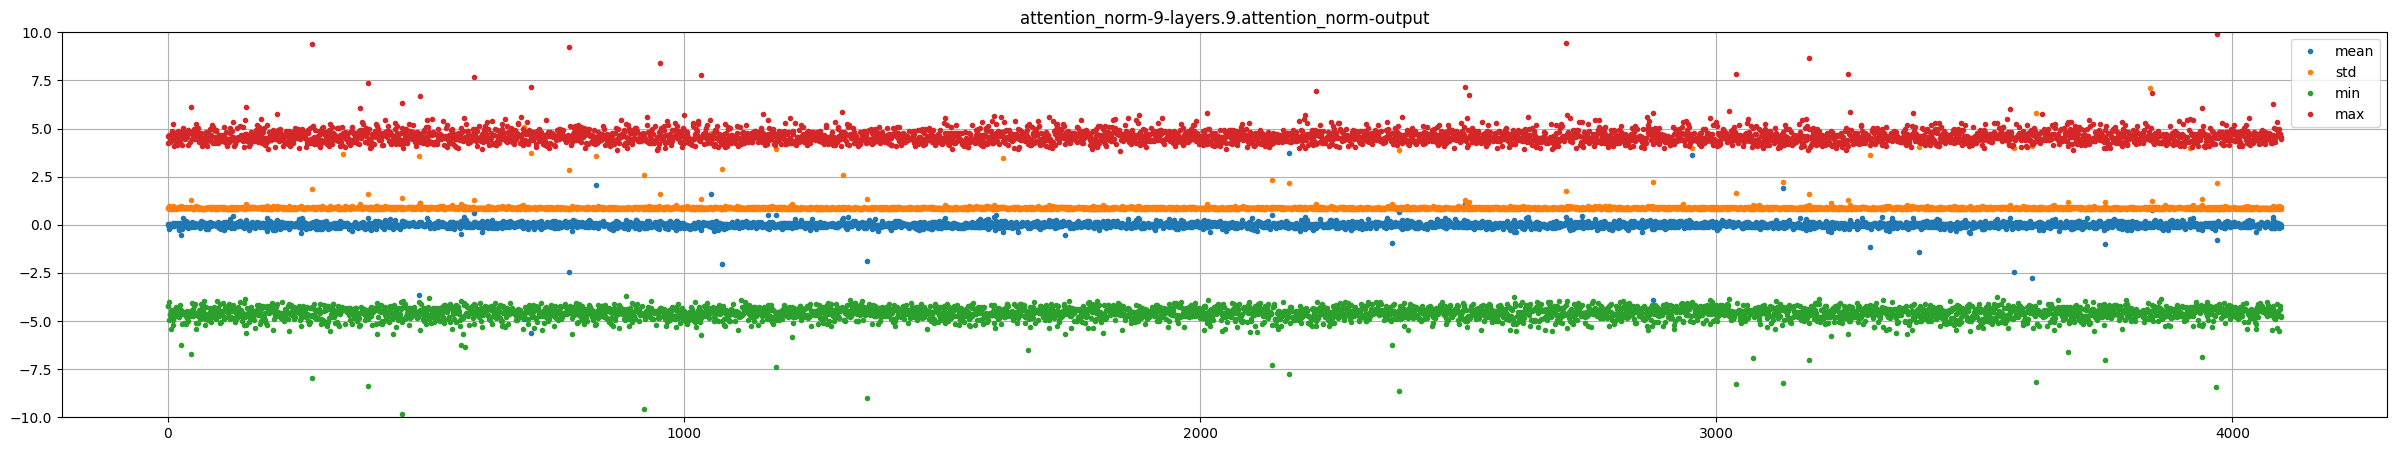

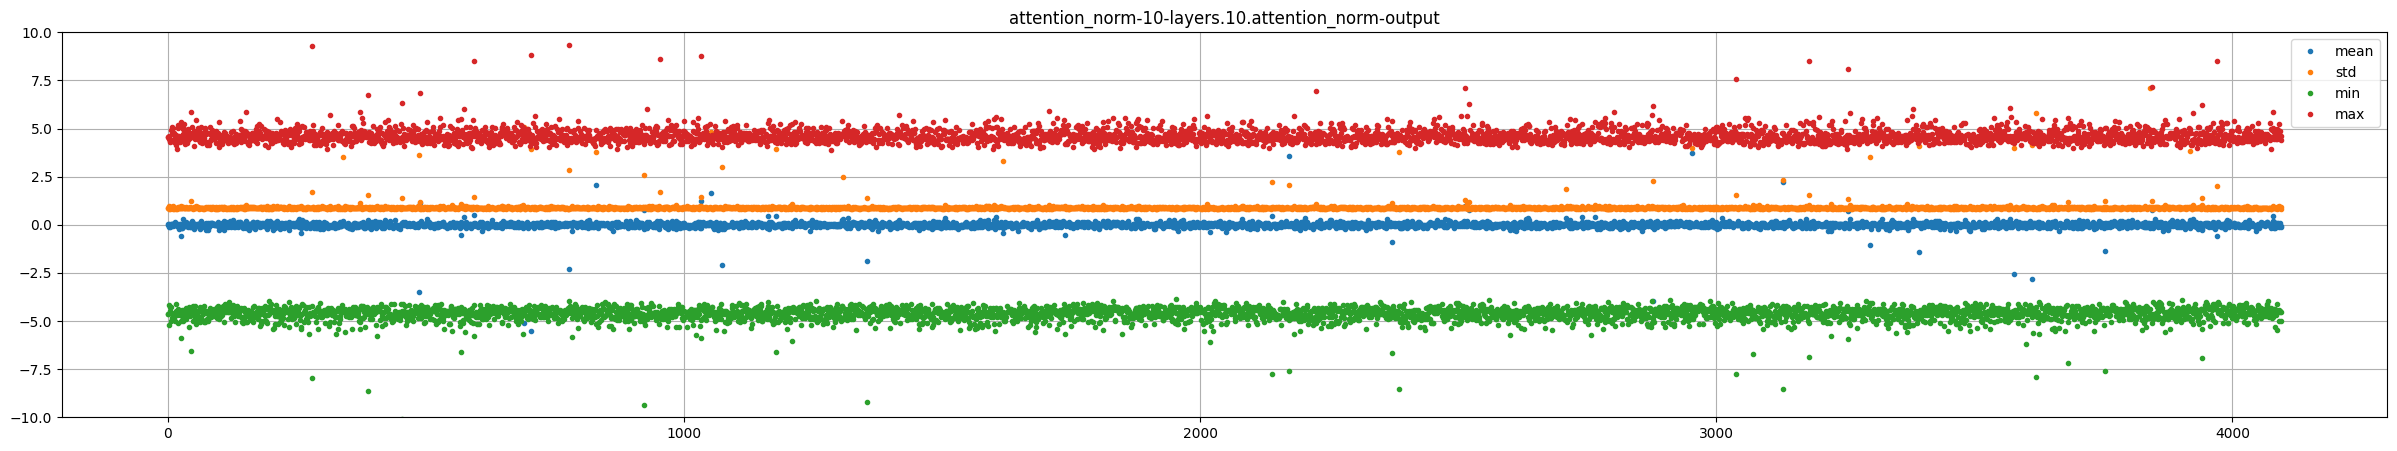

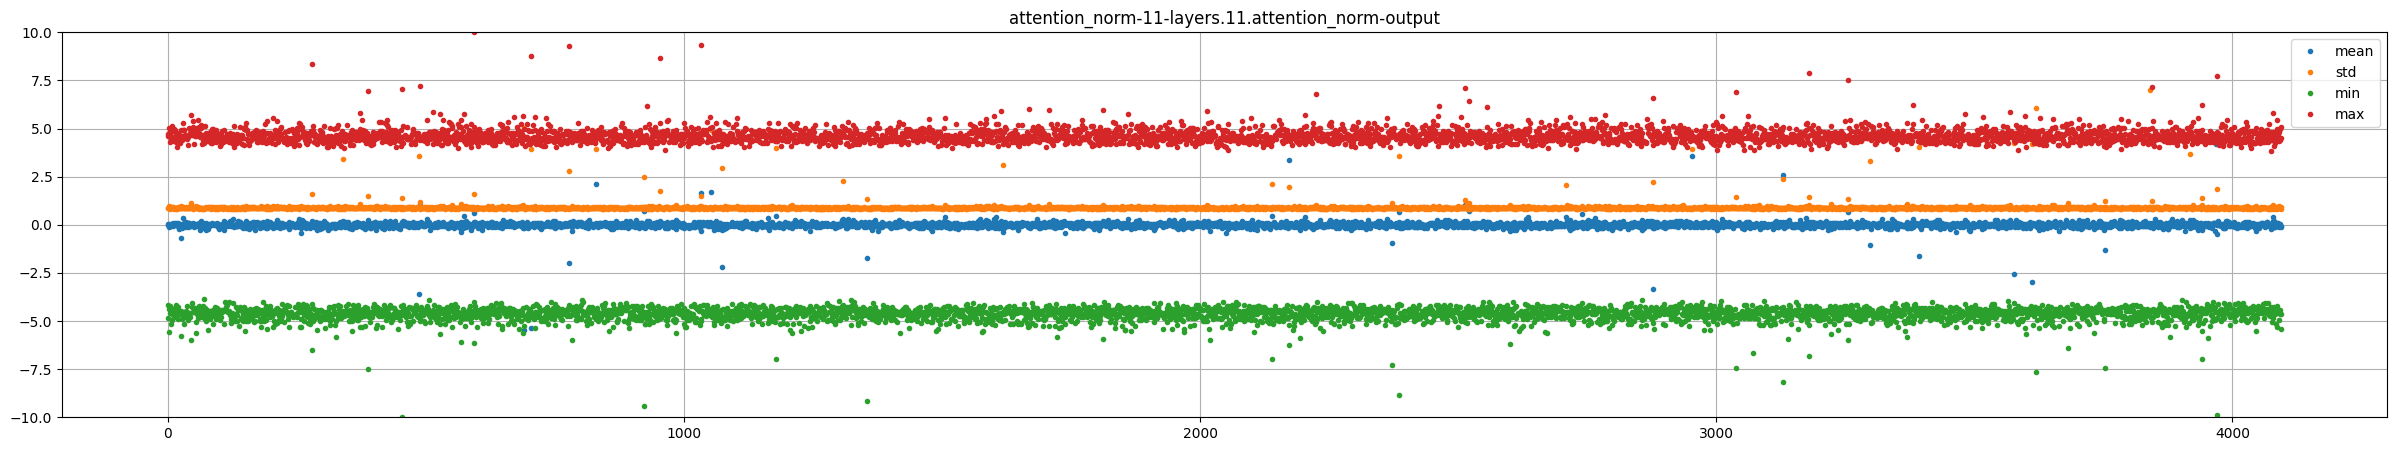

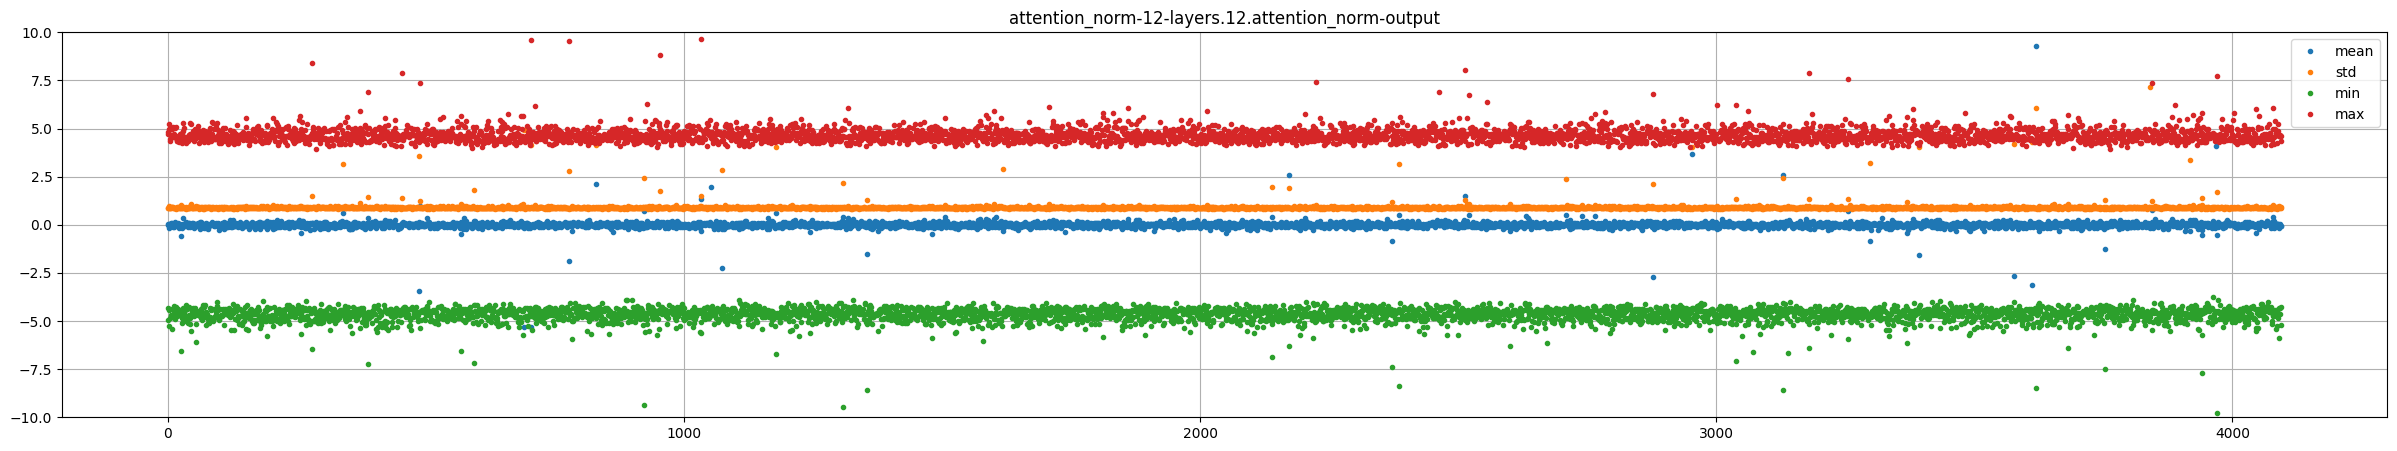

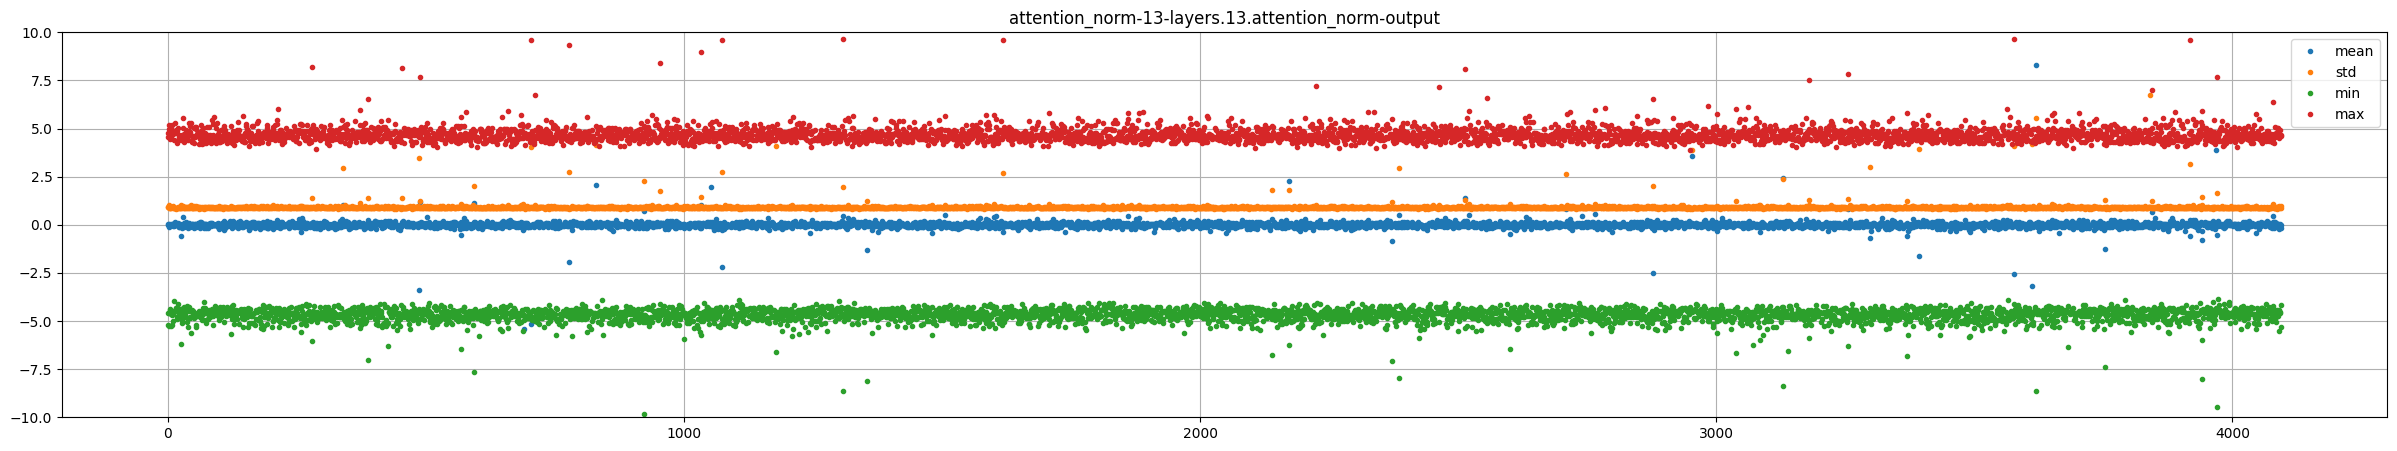

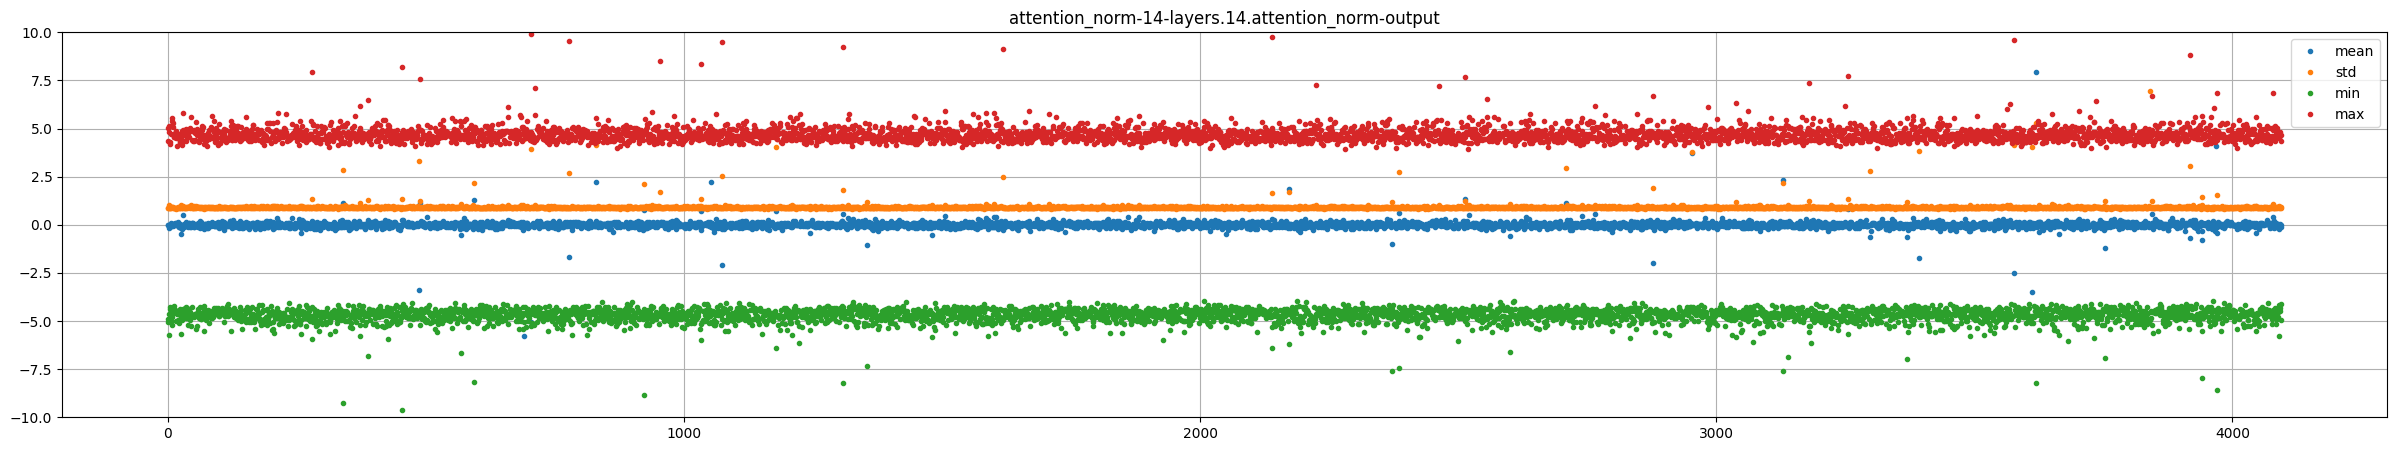

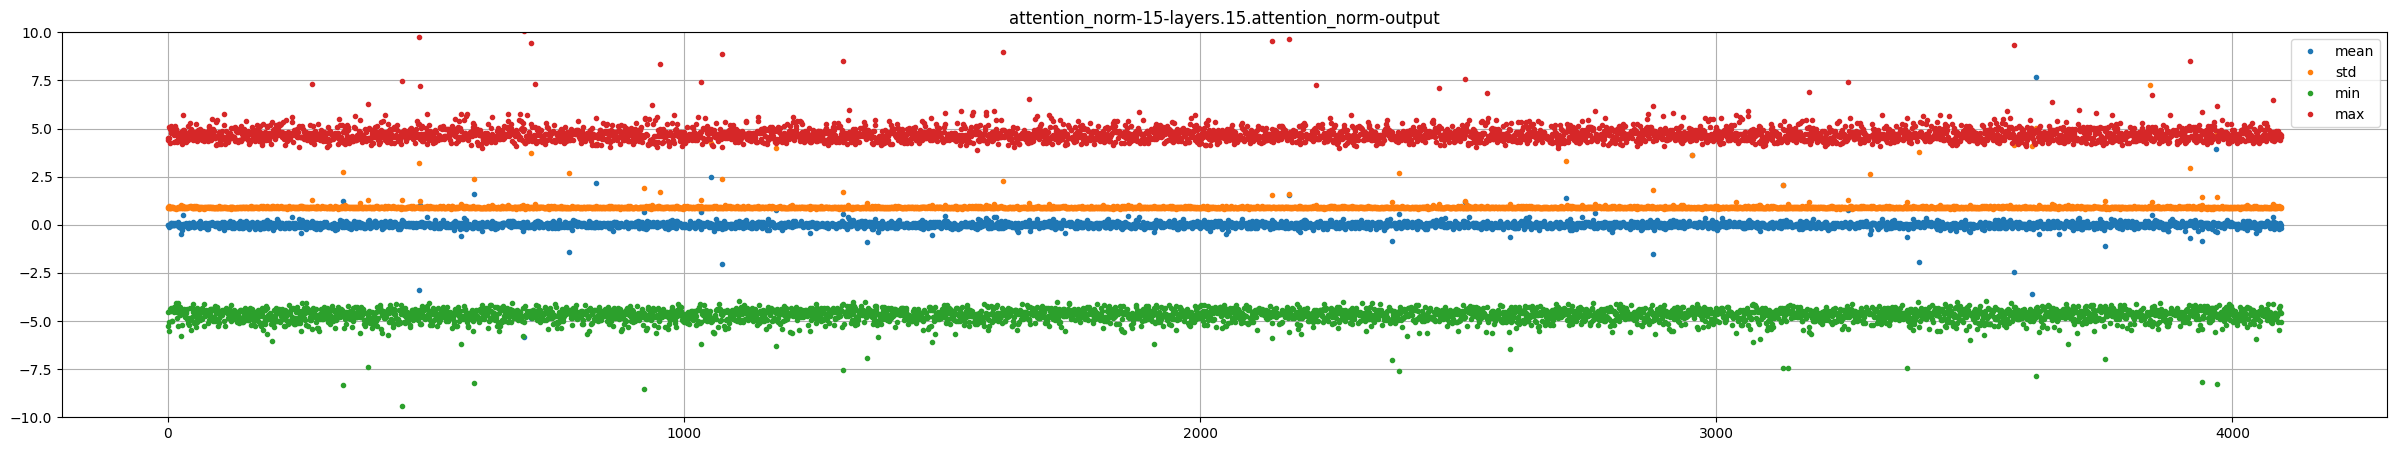

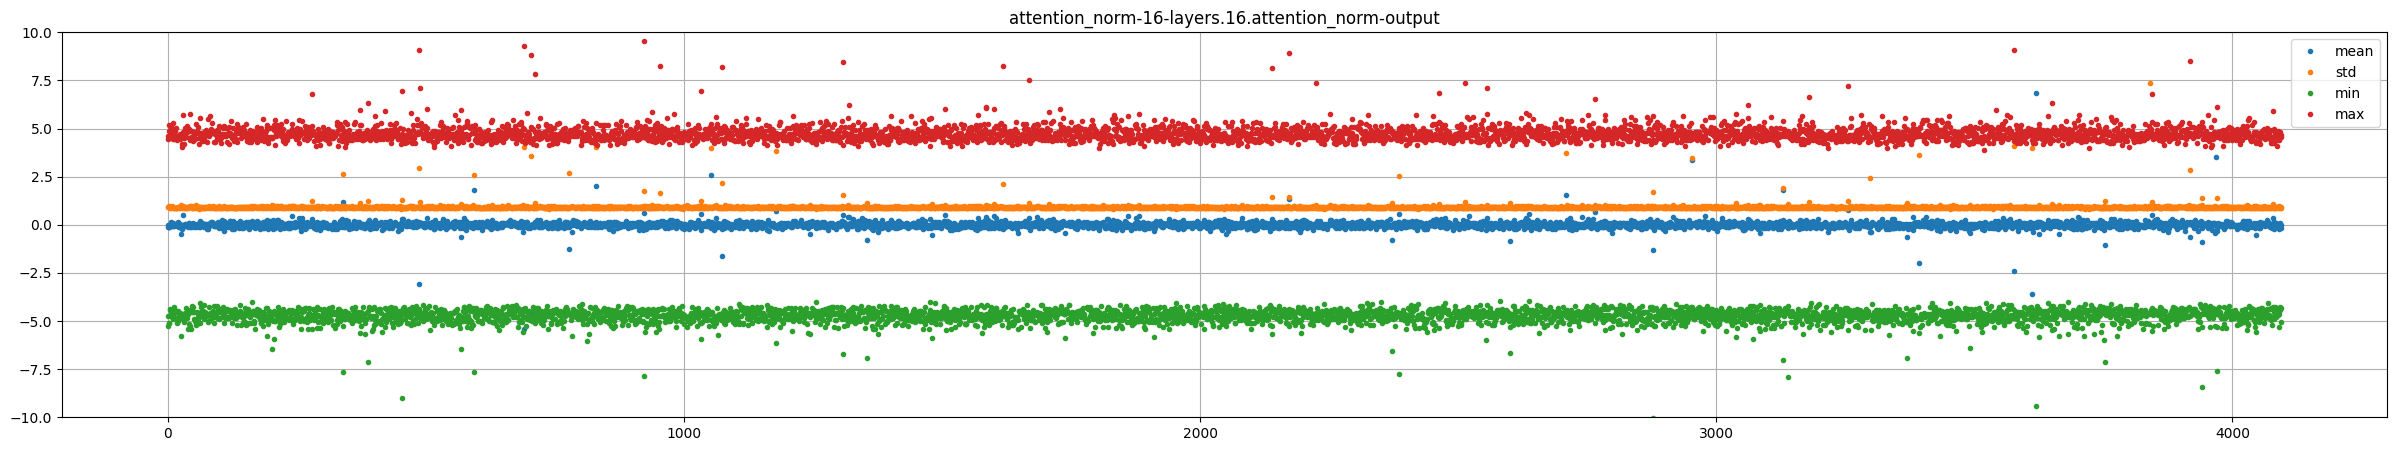

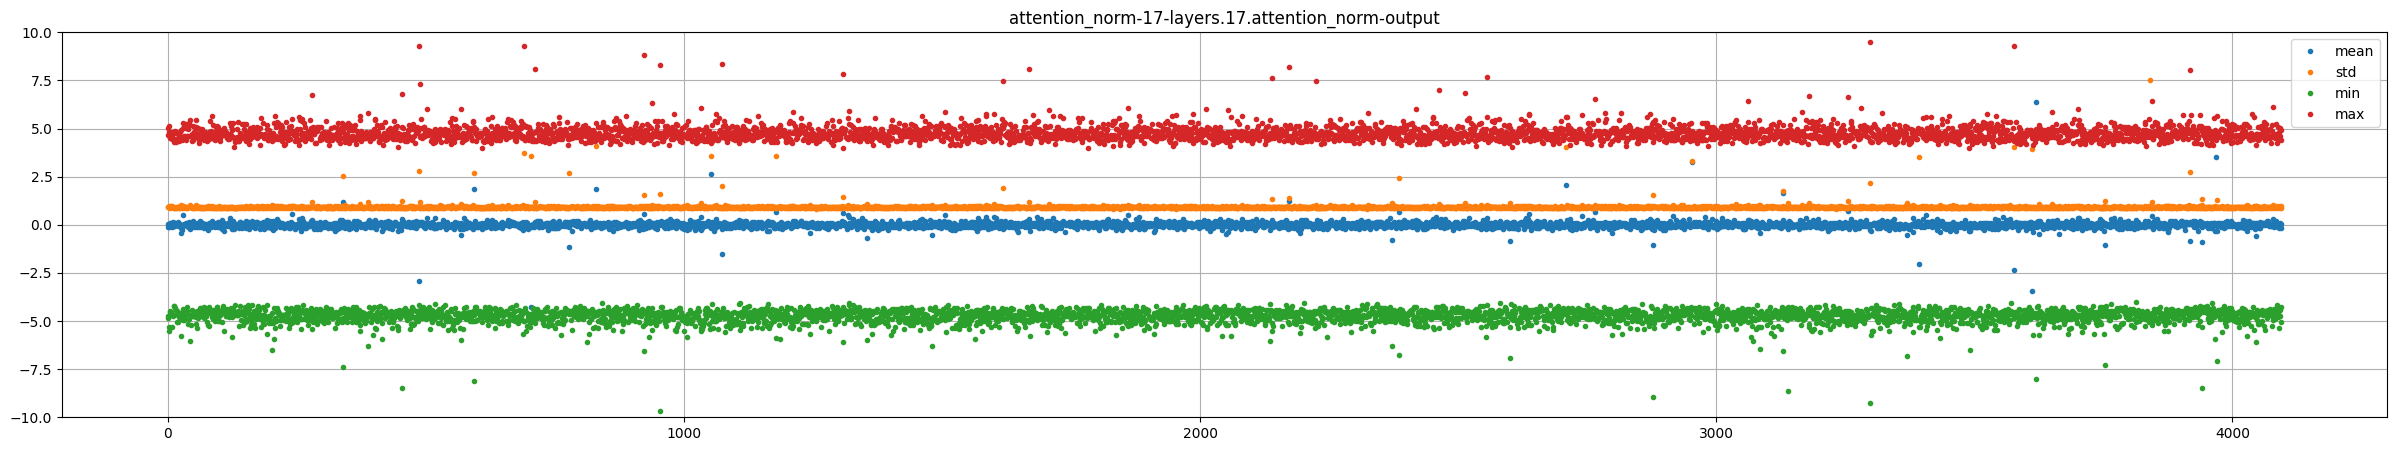

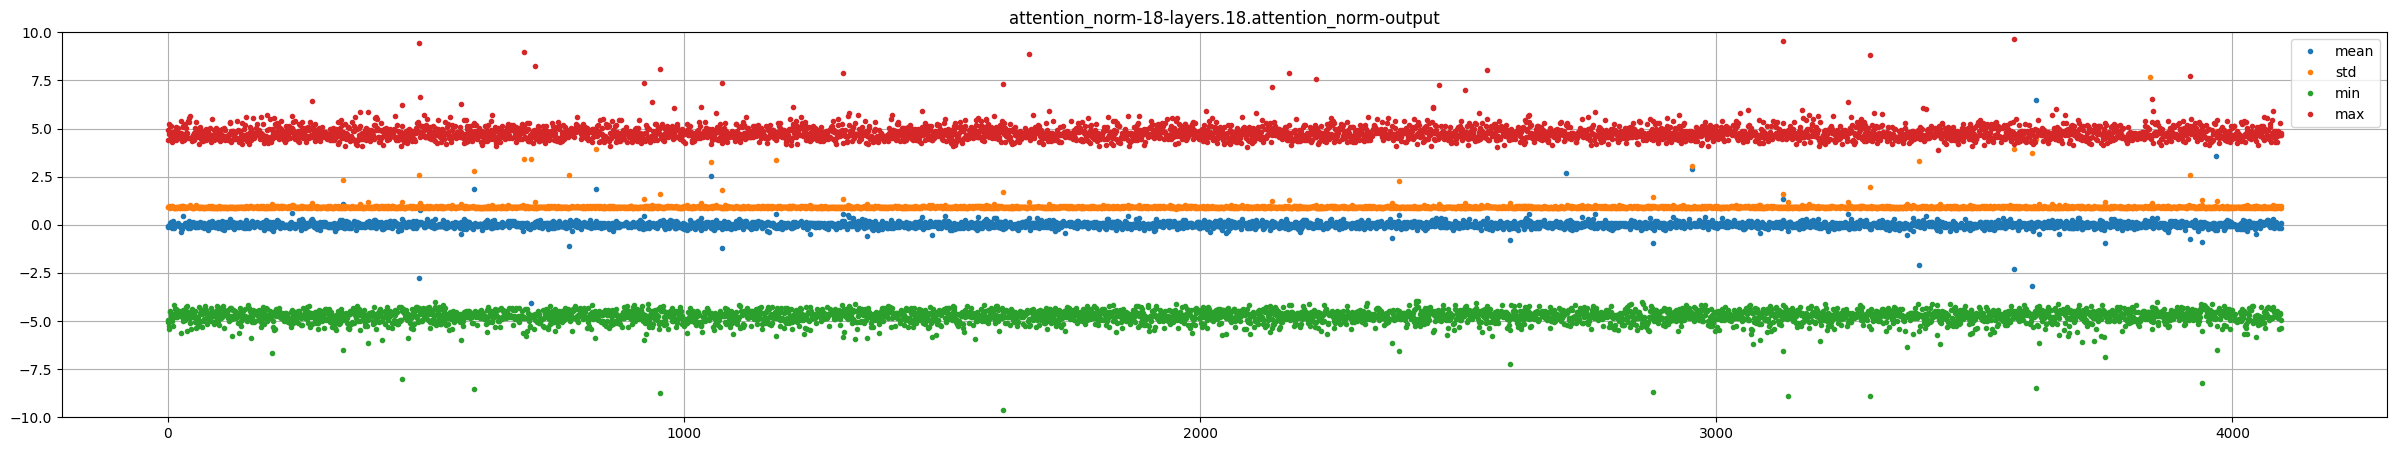

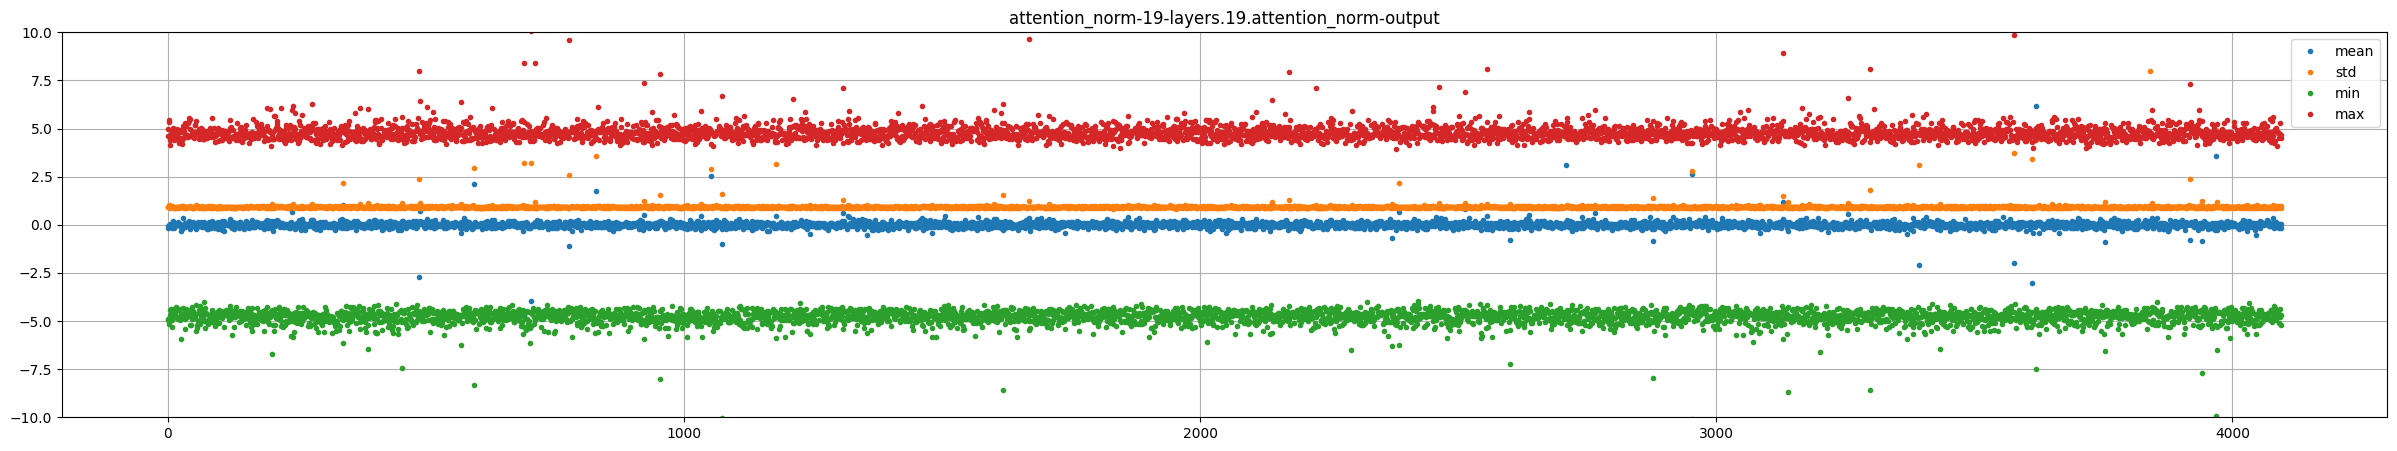

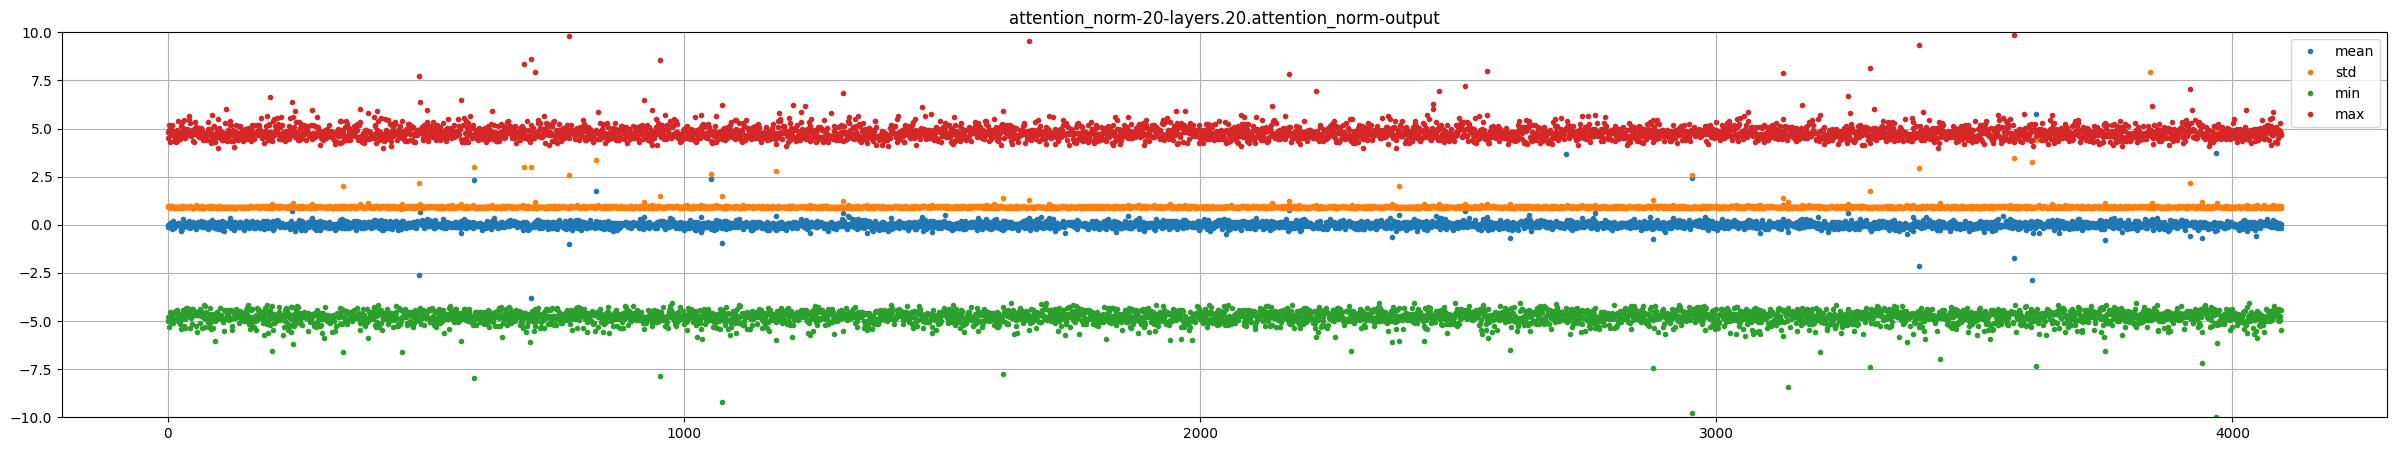

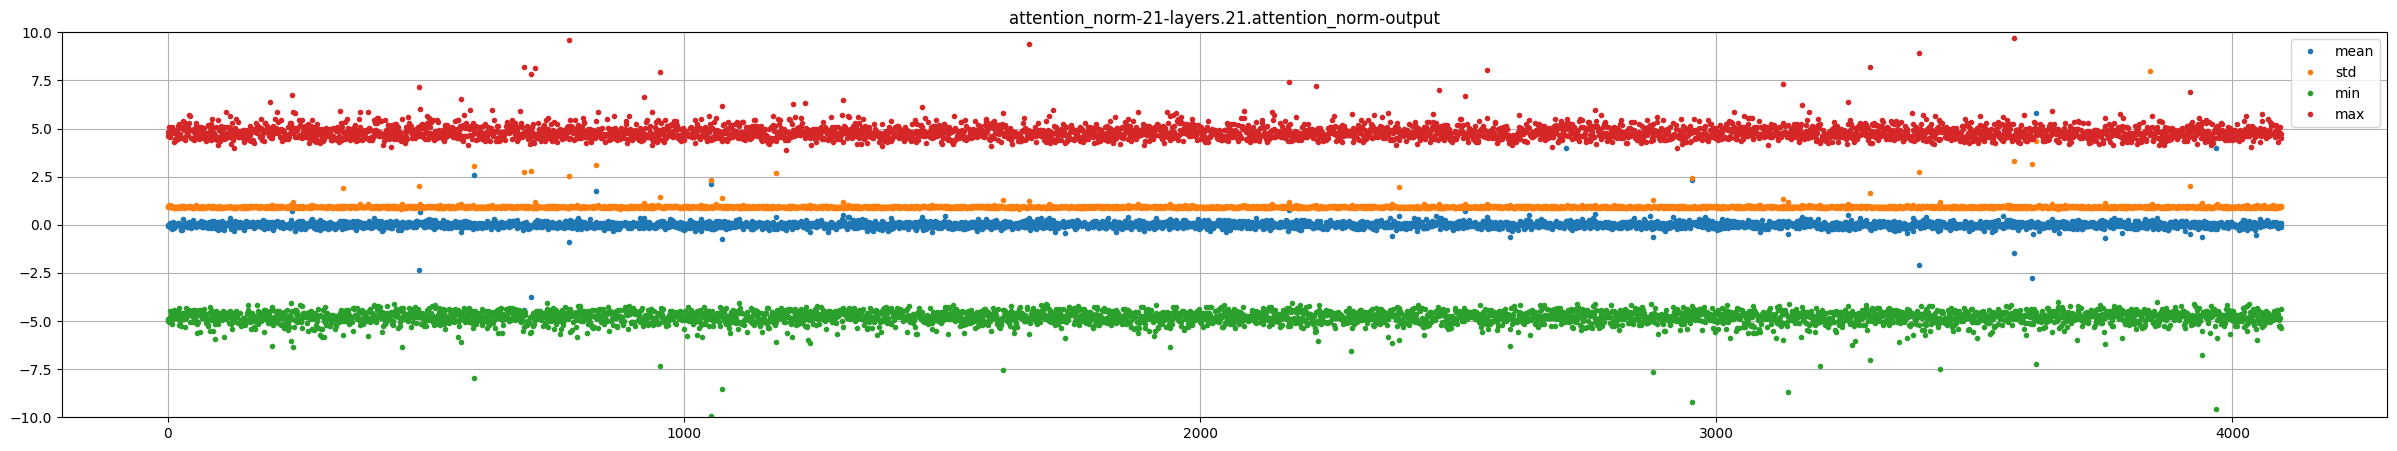

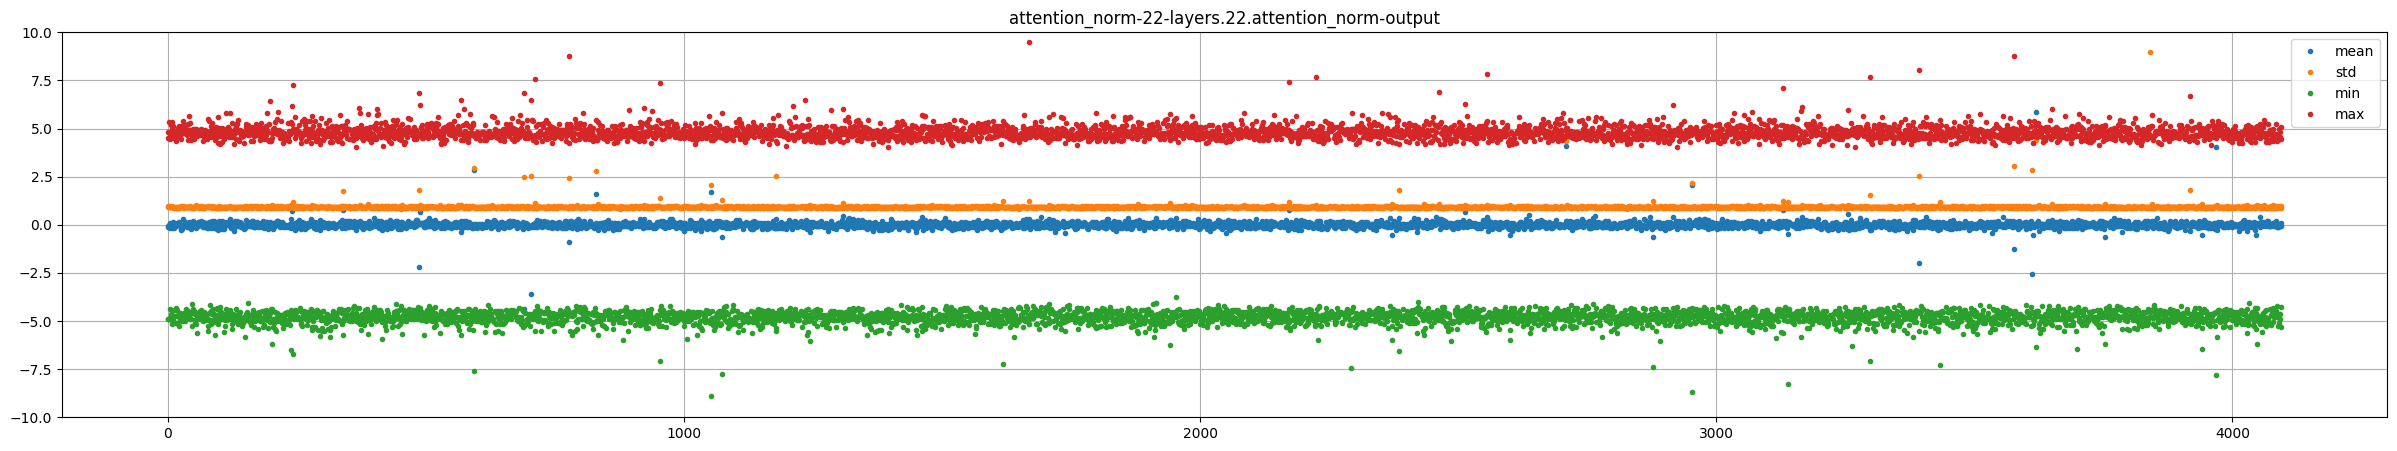

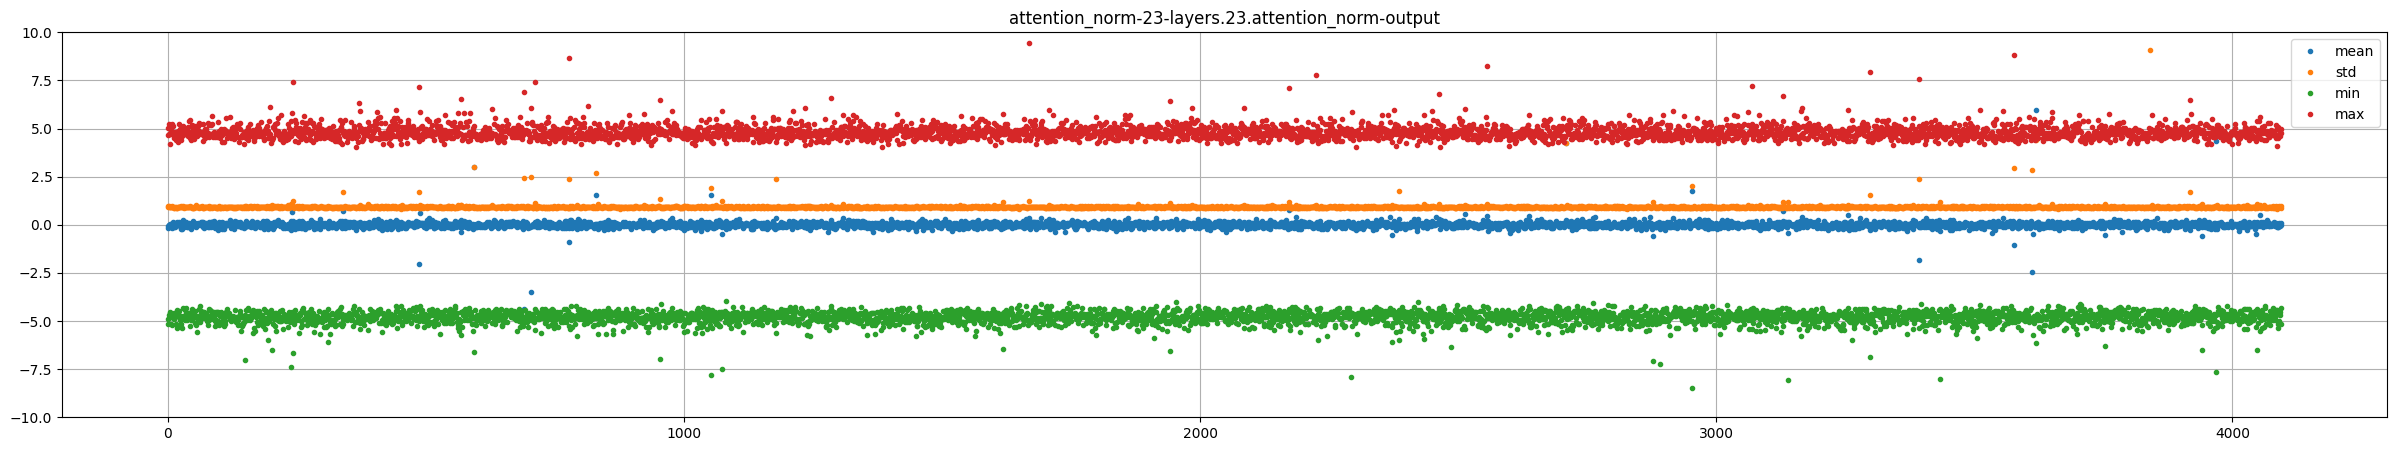

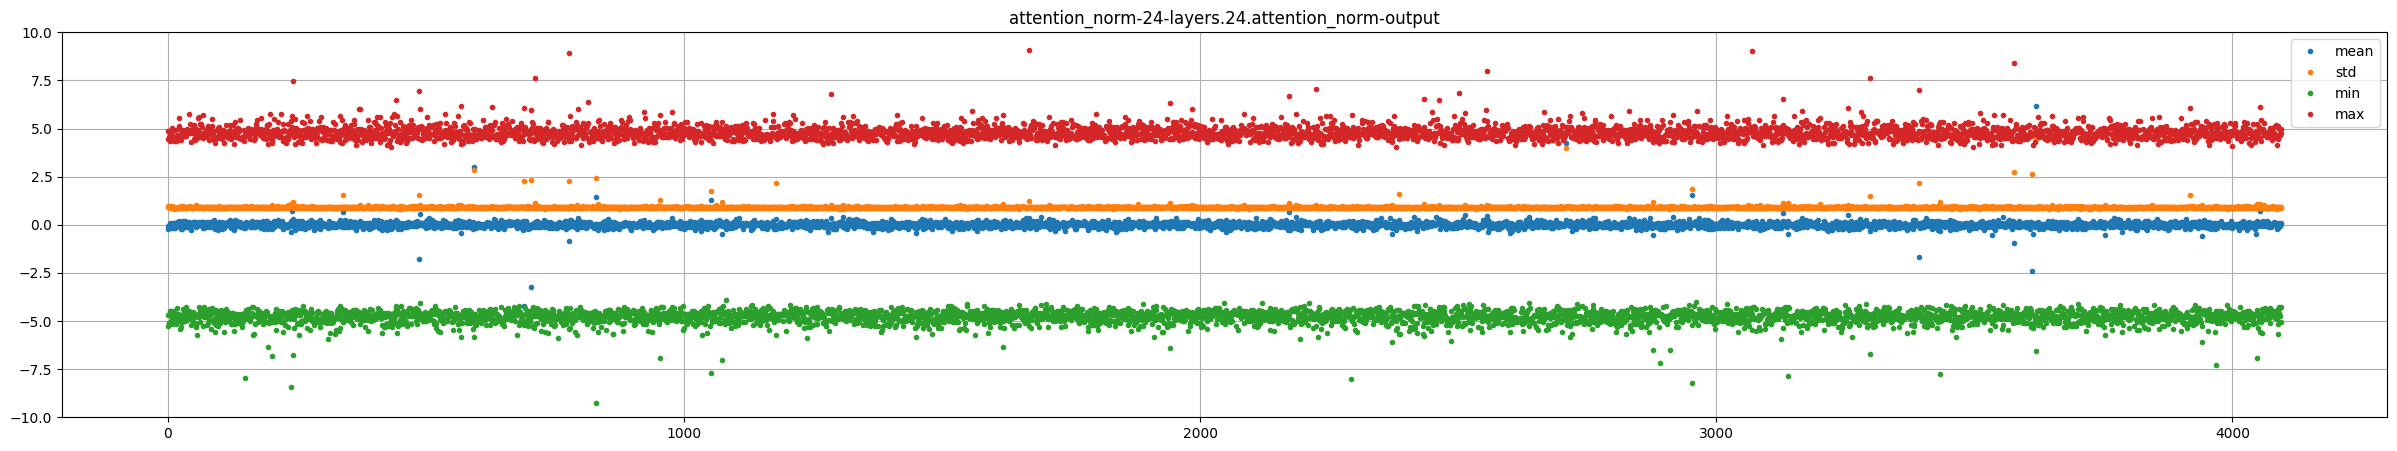

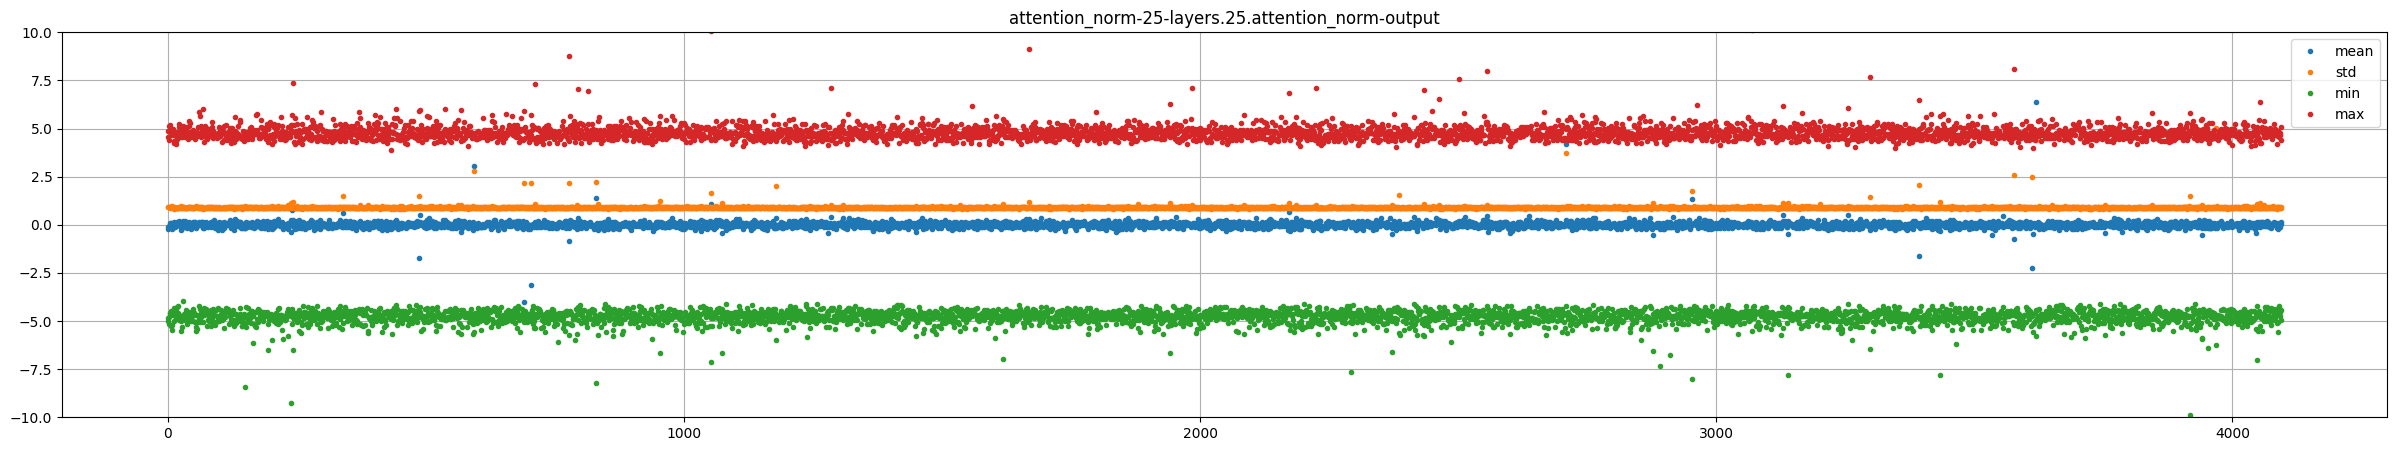

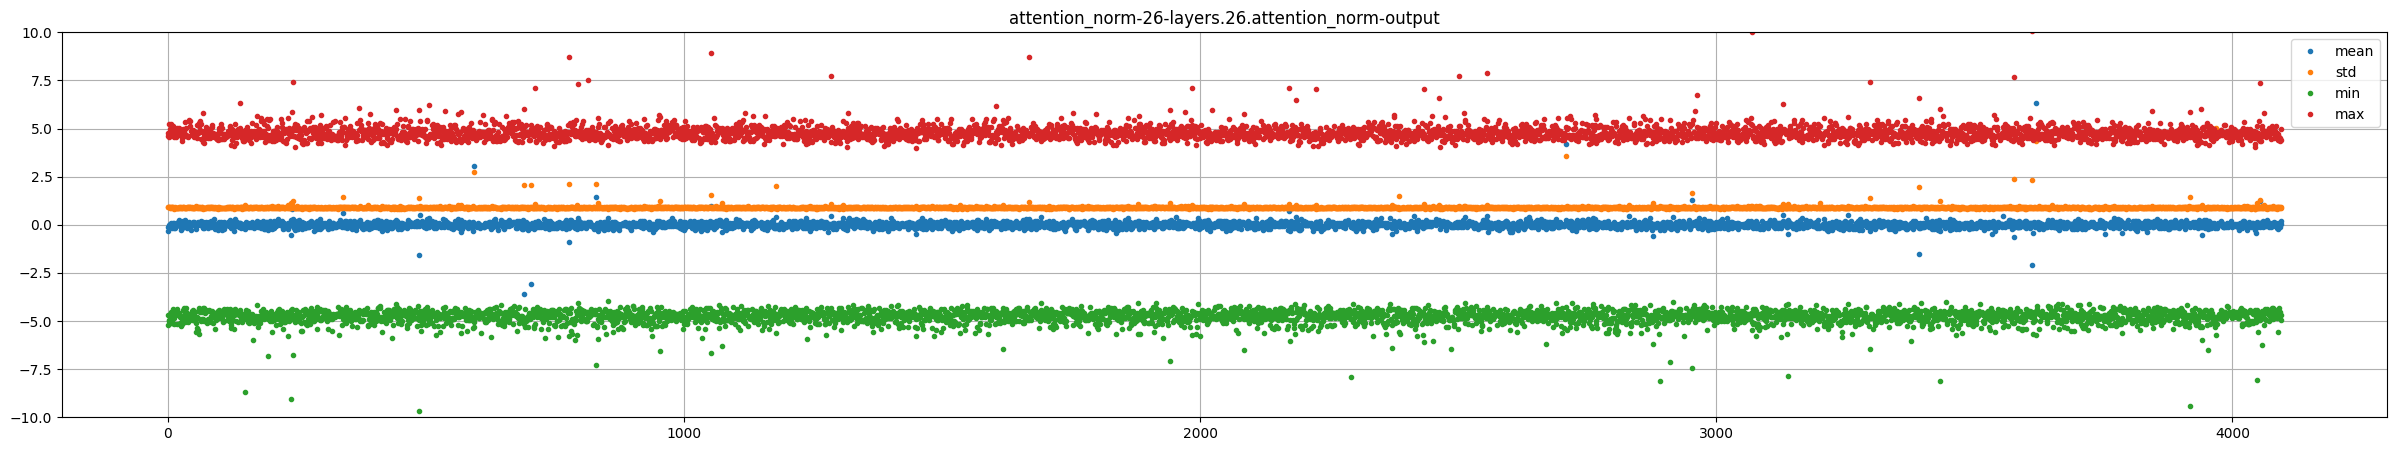

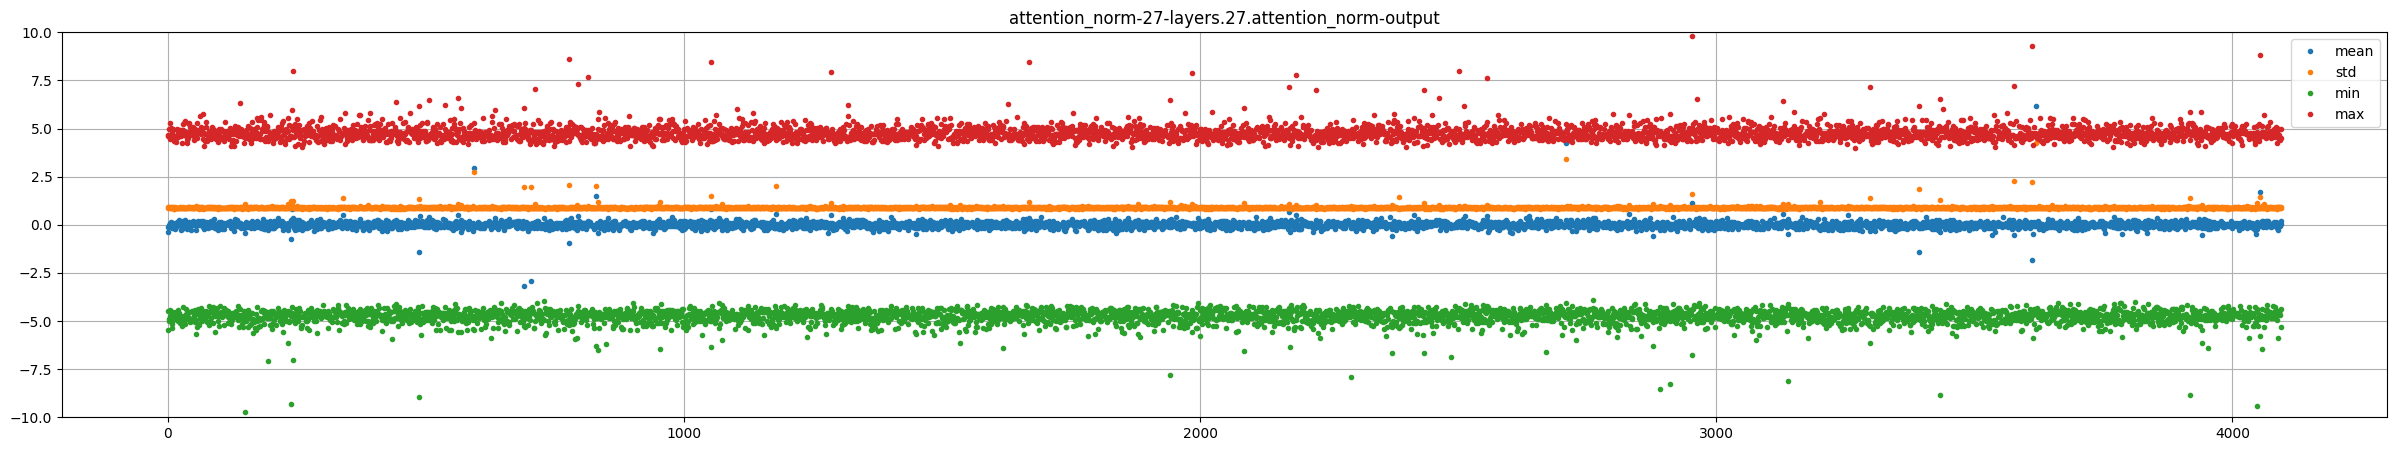

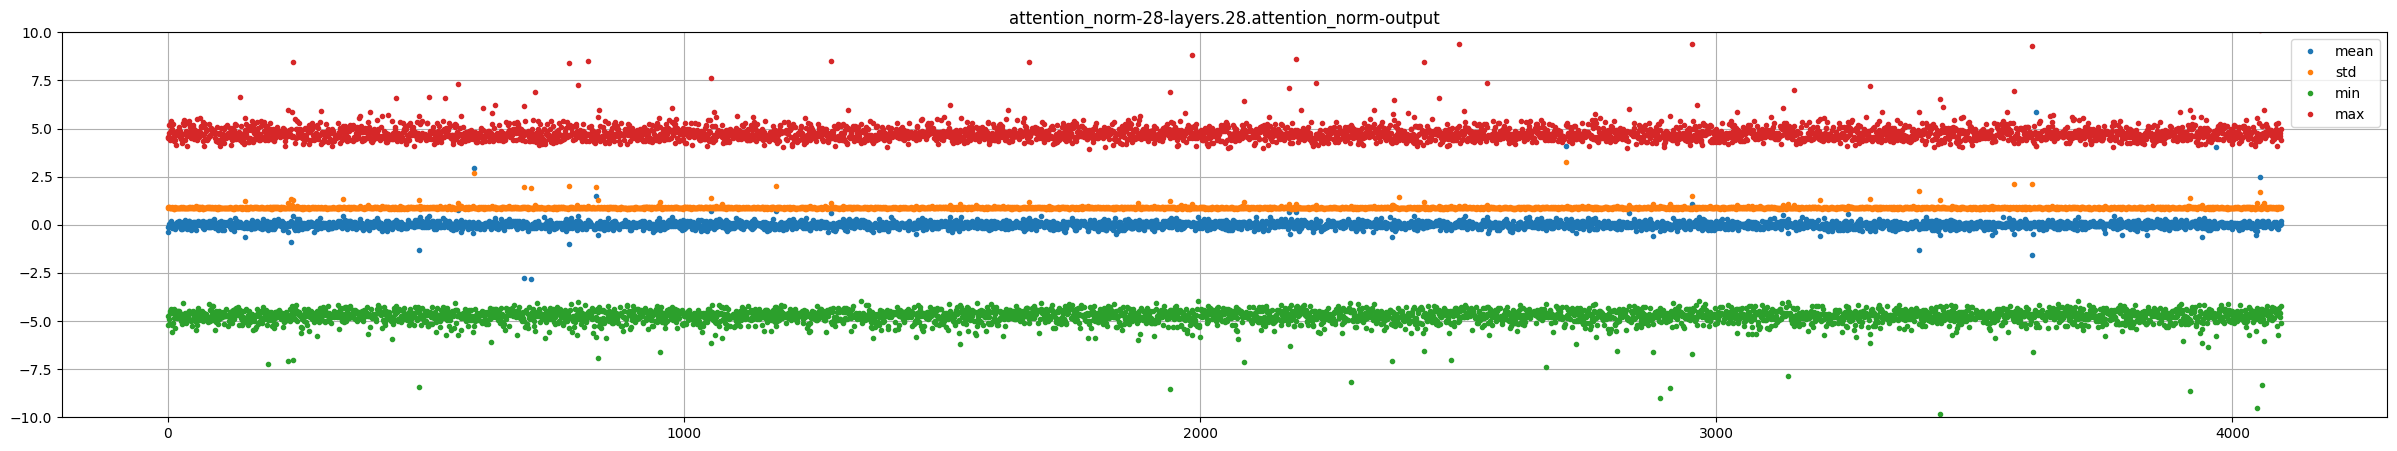

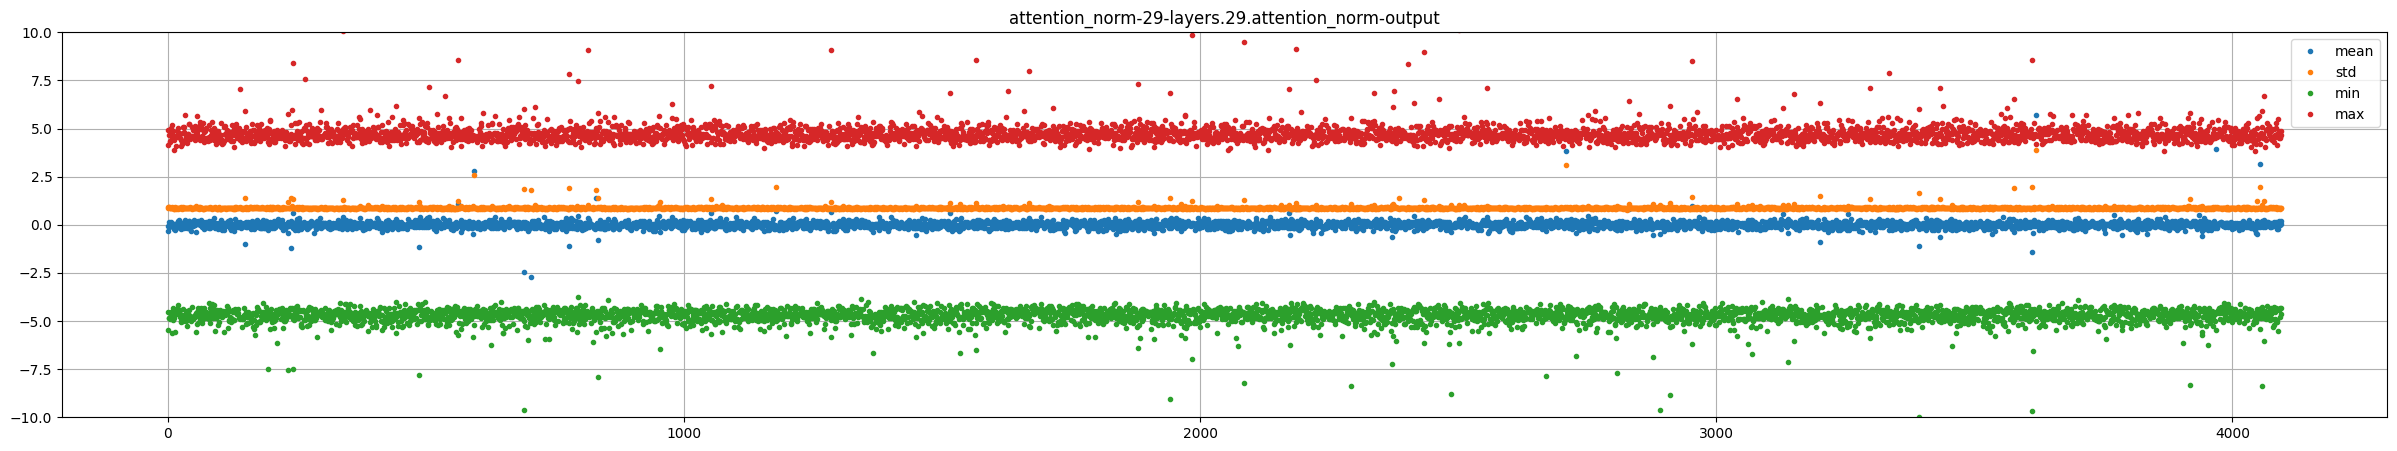

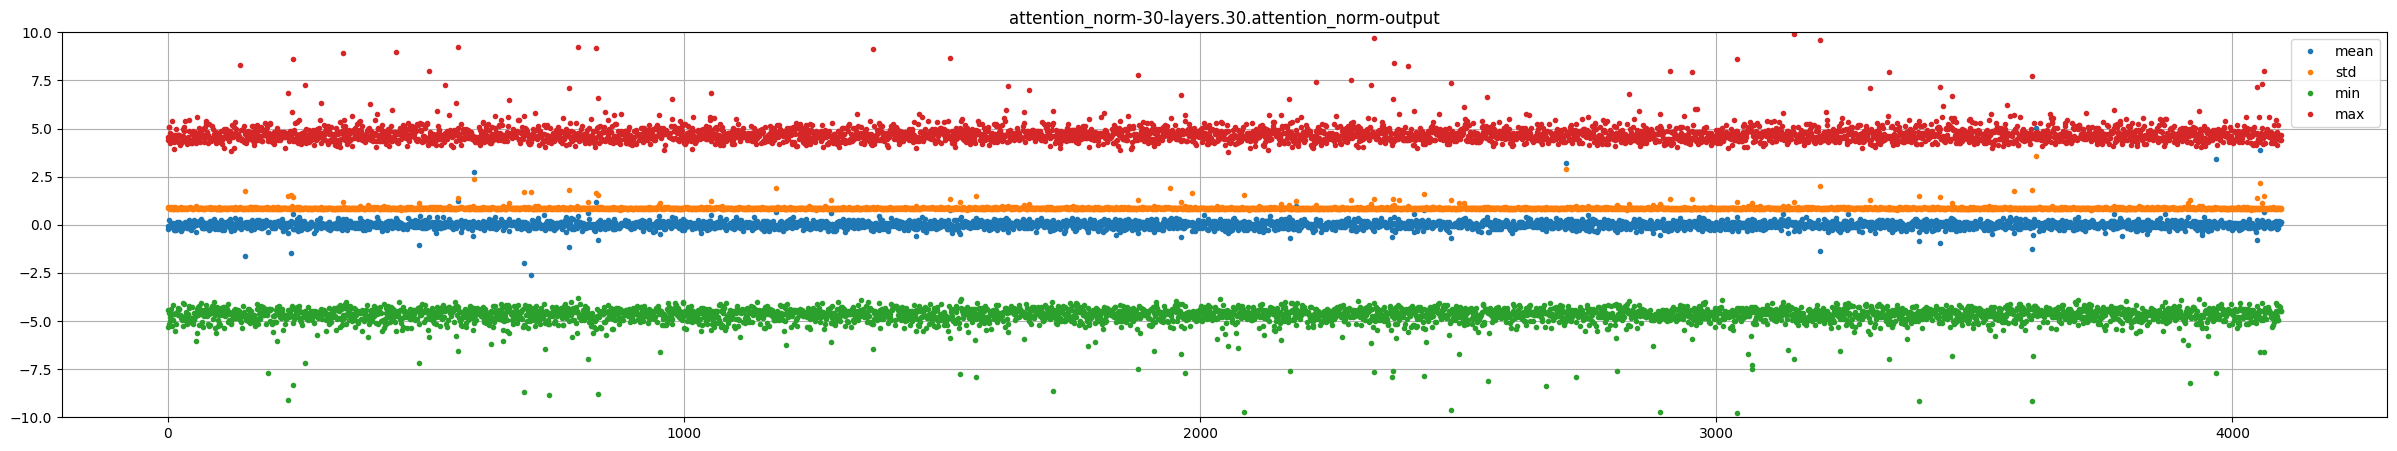

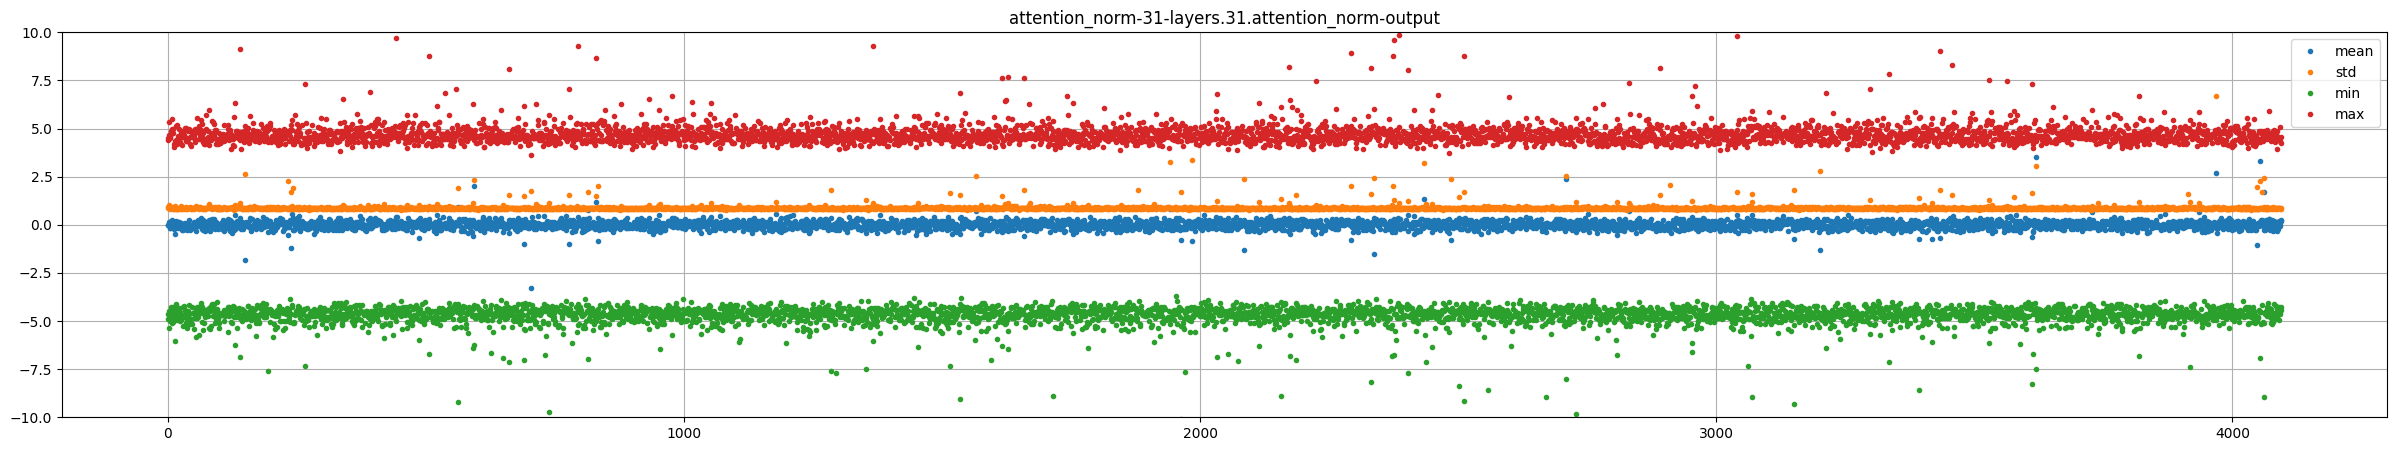

In [4]:
import matplotlib.pyplot as plt

for i in range(32):
    name = f'layers.{i}.attention_norm-output'
    stat = acts[name]
    amin, amax, mean, std = stat.min, stat.max, stat.mean, stat.std
    absmax = torch.maximum(torch.abs(amin), torch.abs(amax))
    plt.figure(figsize=(30,5))
    plt.plot(mean.cpu().numpy(), '.')
    plt.plot(std.cpu().numpy(), '.')
    plt.plot(amin.cpu().numpy(), '.')
    plt.plot(amax.cpu().numpy(), '.')
    plt.ylim(-10, 10)
    # plt.xlim(-1, 4)
    plt.grid(which='both')
    plt.legend(['mean', 'std', 'min', 'max'])
    title = f'attention_norm-{i}-{name}'
    plt.title(title)
    plt.show()
    plt.close()
    # plt.figure(figsize=(30,3))
    # plt.plot((std/absmax).cpu().numpy(), '.')
    # # plt.xlim(-10, 1024)
    # plt.grid(which='both')
    # title = f'wq-{i}-{name}-norm'
    # plt.title(title)
    # plt.show()
    # plt.close()

In [31]:
stat.min



tensor([-3.6836, -4.0195, -4.1914,  ..., -3.8242, -3.6758, -4.0078],
       device='cuda:0', dtype=torch.float64)

In [15]:
stat.max

tensor([1.7188, 0.0453, 0.8774,  ..., 1.8438, 0.7324, 1.2568], device='cuda:0',
       dtype=torch.float64)

In [17]:
stat.std

tensor([0.0793, 0.0629, 0.0593,  ..., 0.1323, 0.1484, 0.1497], device='cuda:0',
       dtype=torch.float64)